In [1]:
# Import af n√∏dvendige biblioteker:

## Datah√•ndtering og visualisering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Forbehandling
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

## Maskinl√¶ring ‚Äì modeller
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans

## Evaluering og modeltr√¶ning
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    silhouette_score
)


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/LukasRonberg/BIExam/refs/heads/main/data/master.csv")

In [3]:
df.shape

(27820, 12)

In [4]:
list(df)

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [5]:
df.sample(5)

country  year     sex          age  suicides_no  population  \
8119     El Salvador  1995  female  25-34 years           42      427927   
8455         Estonia  2003  female    75+ years           16       63315   
26920  United States  1991    male    75+ years         2673     4769000   
24633         Sweden  2009    male  55-74 years          261     1029075   
1619       Australia  2001    male  35-54 years          752     2803465   

       suicides/100k pop       country-year  HDI for year  gdp_for_year ($)   \
8119                9.81    El Salvador1995         0.566      8,921,947,100   
8455               25.27        Estonia2003           NaN      9,833,870,709   
26920              56.05  United States1991           NaN  6,174,043,000,000   
24633              25.36         Sweden2009           NaN    429,657,033,108   
1619               26.82      Australia2001           NaN    378,215,090,694   

       gdp_per_capita ($)       generation  
8119                 1845     Generation X  
8455                 7523           Silent  
26920               26503  G.I. Generation  
24633               49070           Silent  
1619                20860          Boomers

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [8]:
# dropper hdi pga mange null values
df = df.drop('HDI for year', axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.3+ MB


In [10]:
df.duplicated().sum()

0

In [11]:
print(list(df.columns))


['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']


In [12]:
# laver ny column s√• gdp for year bliver til numeric i stedet for et objekt

df['gdp_for_year'] = (
    df[' gdp_for_year ($) ']
      .str.replace(r'[^\d]', '', regex=True)
      .astype(float)
)


In [13]:
df = df.drop(columns=['country-year', ' gdp_for_year ($) ', 'generation'])


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   gdp_per_capita ($)  27820 non-null  int64  
 8   gdp_for_year        27820 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.9+ MB


In [15]:
age_order = ['5-14 years','15-24 years','25-34 years',
             '35-54 years','55-74 years','75+ years']

df['age'] = pd.Categorical(
    df['age'],
    categories=age_order,
    ordered=True
)

df['age_encoded'] = df['age'].cat.codes

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   country             27820 non-null  object  
 1   year                27820 non-null  int64   
 2   sex                 27820 non-null  object  
 3   age                 27820 non-null  category
 4   suicides_no         27820 non-null  int64   
 5   population          27820 non-null  int64   
 6   suicides/100k pop   27820 non-null  float64 
 7   gdp_per_capita ($)  27820 non-null  int64   
 8   gdp_for_year        27820 non-null  float64 
 9   age_encoded         27820 non-null  int8    
dtypes: category(1), float64(2), int64(4), int8(1), object(2)
memory usage: 1.8+ MB


In [17]:
df.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop  gdp_per_capita ($)  gdp_for_year  age_encoded  
0               6.71                 796  2.156625e+09            1  
1               5.19                 796  2.156625e+09            3  
2               4.83                 796  2.156625e+09            1  
3               4.59                 796  2.156625e+09            5  
4               3.28                 796  2.156625e+09            2

In [18]:
df['sex_numeric'] = df['sex'].map({'male': 1, 'female': 2})

In [19]:
# Vi opretter en mapping-dictionary, der tildeler hvert land et unikt nummer (i alfabetisk r√¶kkef√∏lge)
countries = sorted(df['country'].unique())
country_map = {c: i+1 for i, c in enumerate(countries)}

# Vi anvender mappingen og tilf√∏jer en ny kolonne med landenes numeriske v√¶rdier
df['country_numeric'] = df['country'].map(country_map)

# Vi udskriver mappingen for at inspicere resultatet
print(country_map)

{'Albania': 1, 'Antigua and Barbuda': 2, 'Argentina': 3, 'Armenia': 4, 'Aruba': 5, 'Australia': 6, 'Austria': 7, 'Azerbaijan': 8, 'Bahamas': 9, 'Bahrain': 10, 'Barbados': 11, 'Belarus': 12, 'Belgium': 13, 'Belize': 14, 'Bosnia and Herzegovina': 15, 'Brazil': 16, 'Bulgaria': 17, 'Cabo Verde': 18, 'Canada': 19, 'Chile': 20, 'Colombia': 21, 'Costa Rica': 22, 'Croatia': 23, 'Cuba': 24, 'Cyprus': 25, 'Czech Republic': 26, 'Denmark': 27, 'Dominica': 28, 'Ecuador': 29, 'El Salvador': 30, 'Estonia': 31, 'Fiji': 32, 'Finland': 33, 'France': 34, 'Georgia': 35, 'Germany': 36, 'Greece': 37, 'Grenada': 38, 'Guatemala': 39, 'Guyana': 40, 'Hungary': 41, 'Iceland': 42, 'Ireland': 43, 'Israel': 44, 'Italy': 45, 'Jamaica': 46, 'Japan': 47, 'Kazakhstan': 48, 'Kiribati': 49, 'Kuwait': 50, 'Kyrgyzstan': 51, 'Latvia': 52, 'Lithuania': 53, 'Luxembourg': 54, 'Macau': 55, 'Maldives': 56, 'Malta': 57, 'Mauritius': 58, 'Mexico': 59, 'Mongolia': 60, 'Montenegro': 61, 'Netherlands': 62, 'New Zealand': 63, 'Nicarag

In [20]:
df.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop  gdp_per_capita ($)  gdp_for_year  age_encoded  \
0               6.71                 796  2.156625e+09            1   
1               5.19                 796  2.156625e+09            3   
2               4.83                 796  2.156625e+09            1   
3               4.59                 796  2.156625e+09            5   
4               3.28                 796  2.156625e+09            2   

   sex_numeric  country_numeric  
0            1                1  
1            1                1  
2            2                1  
3            1                1  
4            1                1

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   country             27820 non-null  object  
 1   year                27820 non-null  int64   
 2   sex                 27820 non-null  object  
 3   age                 27820 non-null  category
 4   suicides_no         27820 non-null  int64   
 5   population          27820 non-null  int64   
 6   suicides/100k pop   27820 non-null  float64 
 7   gdp_per_capita ($)  27820 non-null  int64   
 8   gdp_for_year        27820 non-null  float64 
 9   age_encoded         27820 non-null  int8    
 10  sex_numeric         27820 non-null  int64   
 11  country_numeric     27820 non-null  int64   
dtypes: category(1), float64(2), int64(6), int8(1), object(2)
memory usage: 2.2+ MB


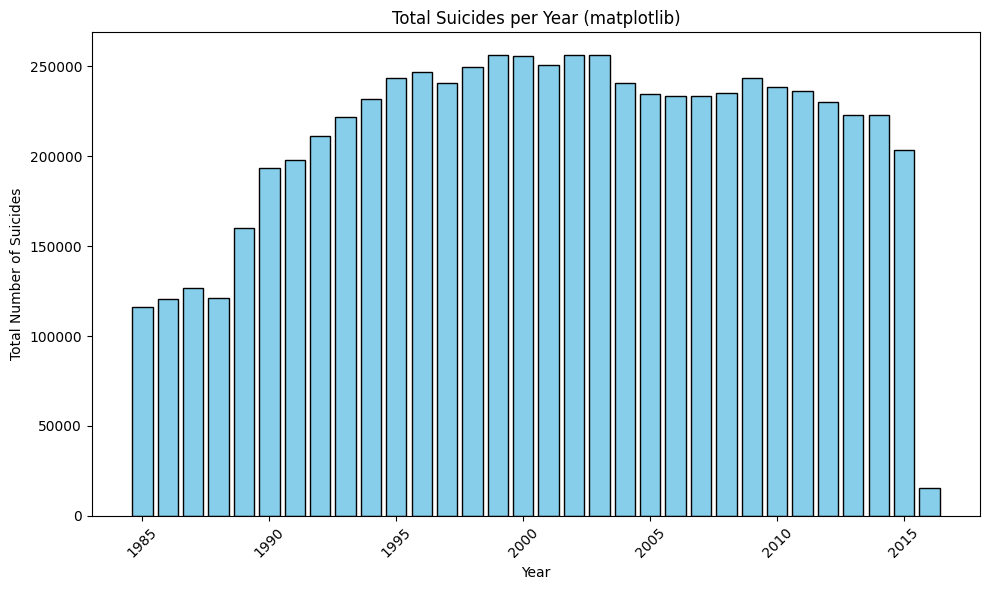

In [22]:
# Vi summerer det samlede antal selvmord pr. √•r
yearly = df.groupby('year', as_index=False)['suicides_no'].sum()

# Vi visualiserer udviklingen med et s√∏jlediagram (matplotlib)
plt.figure(figsize=(10,6))
plt.bar(yearly['year'], yearly['suicides_no'], color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Total Number of Suicides')
plt.title('Total Suicides per Year (matplotlib)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Vi fjerner alle rows i 2016, da dataen fra det √•r er minimalt
df = df[df['year'] != 2016]

# Vi tjekker at kolonnen er v√¶k
print(df['year'].unique())

[1987 1988 1989 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 1985 1986 1990 1991 2012 2013
 2014 2015 2011]


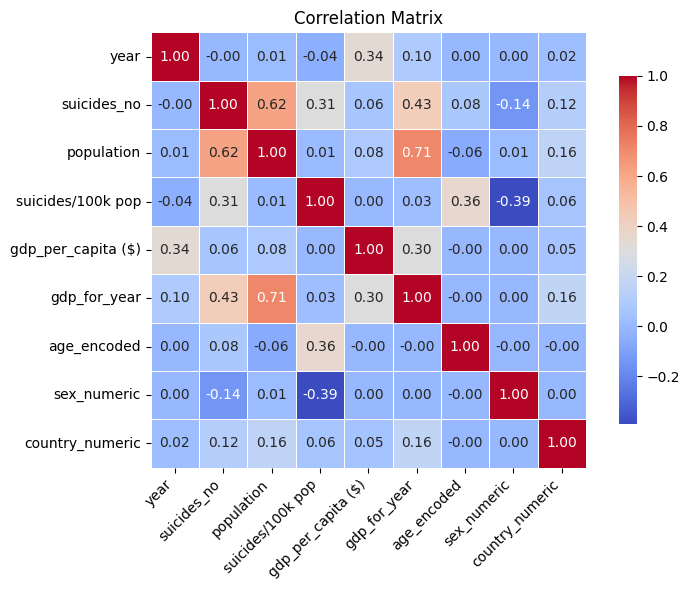

In [24]:
# Vi beregner korrelationsmatrixen for alle numeriske kolonner
corr = df.corr(numeric_only=True)

# Vi visualiserer korrelationerne med et heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    square=True,
    linewidths=0.5
)
plt.title("Correlation Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Analyse af Korrelationsmatrix

Vi har valgt **`suicides/100k pop`** som vores afh√¶ngige variabel, da den bedst udtrykker antallet af selvmord normaliseret pr. 100.000 indbyggere og dermed er sammenlignelig p√• tv√¶rs af lande og befolkninger.

Ud fra korrelationsmatricen ser vi f√∏lgende:

| Uafh√¶ngig variabel    | Korrelation med `suicides/100k pop` | Tolkning |
|-----------------------|--------------------------------------|----------|
| `age_encoded`         | **+0.36**                            | Der er en moderat positiv sammenh√¶ng ‚Äì alder har betydning. |
| `sex_numeric`         | **-0.39**                            | Der ses en tydelig forskel mellem k√∏n ‚Äì selvmordsraten er h√∏jere for m√¶nd. |
| `gdp_per_capita ($)`  | +0.03                                | Ingen n√¶vnev√¶rdig line√¶r sammenh√¶ng. |
| `gdp_for_year`        | +0.03                                | Svag korrelation ‚Äì √∏konomisk niveau alene forklarer ikke forskelle. |
| `population`          | +0.01                                | Ubetydelig. |
| `year`                | -0.04                                | Ingen reel sammenh√¶ng. |
| `country_numeric`     | +0.06                                | Ikke signifikant. |

---

### Konklusion

- Vi konkluderer, at **alder (`age_encoded`) og k√∏n (`sex_numeric`)** er de mest forklarende faktorer i forhold til selvmordsraten pr. 100.000 personer.
- √òkonomiske variable og tid har ingen eller meget svag line√¶r sammenh√¶ng med selvmordsraterne.
- Vores videre analyser b√∏r fokusere p√• **demografiske faktorer** (alder og k√∏n) og deres samspil.

---

### N√¶ste skridt

- Vi vil visualisere data med fx boxplots eller interaktive grafer.
- Vi vil bygge en simpel **line√¶r regressionsmodel** med alder og k√∏n som forklarende variable.



   age_encoded  suicides/100k pop          age
0            0            2858.39   5-14 years
1            1           41292.61  15-24 years
2            2           56239.60  25-34 years
3            3           68960.47  35-54 years
4            4           74513.18  55-74 years
5            5          110532.19    75+ years


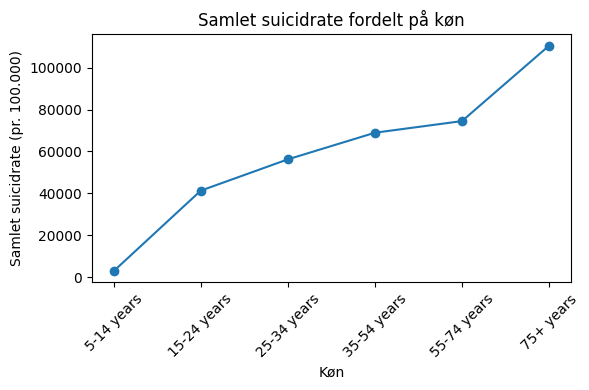

In [25]:
# Da 'age_encoded' ikke gav det forventede resultat i korrelationsanalysen, v√¶lger vi at lave et nyt plot
# for bedre at forst√• sammenh√¶ngen mellem alder og selvmordsrate

# Vi summerer selvmordsraten pr. 100.000 for hver aldersgruppe
age_totals = df.groupby('age_encoded', as_index=False)['suicides/100k pop'].sum()

# Vi mapper de oprindelige aldersbetegnelser tilbage til graffremstilling
age_totals['age'] = age_totals['age_encoded'].map(
    dict(enumerate(age_order))
)

# Vi udskriver aldersgrupperne og deres tilh√∏rende samlede selvmordsrate
print(age_totals)

# Vi visualiserer sammenh√¶ngen mellem aldersgruppe og samlet selvmordsrate
plt.figure(figsize=(6,4))
plt.plot(age_totals['age_encoded'], age_totals['suicides/100k pop'], marker='o')
plt.xticks(age_totals['age_encoded'], age_totals['age'], rotation=45)
plt.xlabel('K√∏n')
plt.ylabel('Samlet suicidrate (pr. 100.000)')
plt.title('Samlet suicidrate fordelt p√• k√∏n')
plt.tight_layout()
plt.show()

   sex_numeric  suicides/100k pop     sex
0            1          279767.16    Mand
1            2           74629.28  Kvinde


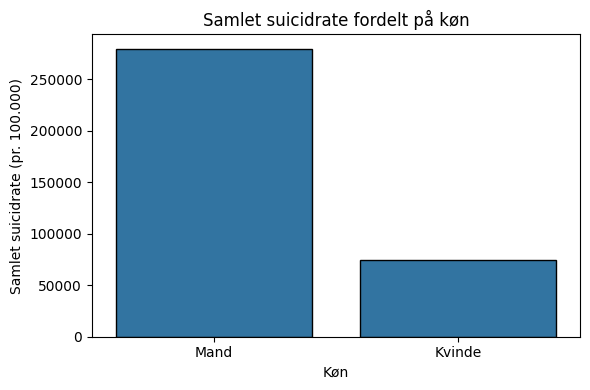

In [26]:
# 1. Vi opretter en numerisk version af k√∏n, hvor 'male' = 1 og 'female' = 2
df['sex_numeric'] = df['sex'].map({'male': 1, 'female': 2})

# 2. Vi summerer selvmordsraten pr. 100.000 for hvert k√∏n
sex_totals = df.groupby('sex_numeric', as_index=False)['suicides/100k pop'].sum()

# 3. Vi mapper tallene tilbage til de oprindelige k√∏nsbetegnelser
sex_map = {1: 'Mand', 2: 'Kvinde'}
sex_totals['sex'] = sex_totals['sex_numeric'].map(sex_map)

# Vi udskriver den samlede selvmordsrate for m√¶nd og kvinder
print(sex_totals)

# Vi visualiserer forskellen i samlet selvmordsrate mellem k√∏nnene
plt.figure(figsize=(6, 4))
sns.barplot(data=sex_totals, x='sex', y='suicides/100k pop', edgecolor='black')
plt.xlabel('K√∏n')
plt.ylabel('Samlet suicidrate (pr. 100.000)')
plt.title('Samlet suicidrate fordelt p√• k√∏n')
plt.tight_layout()
plt.show()



C:\Users\larsg\AppData\Local\Temp\ipykernel_11216\556689092.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_age = df.groupby(['age', 'sex'], as_index=False)['suicides/100k pop'].sum()


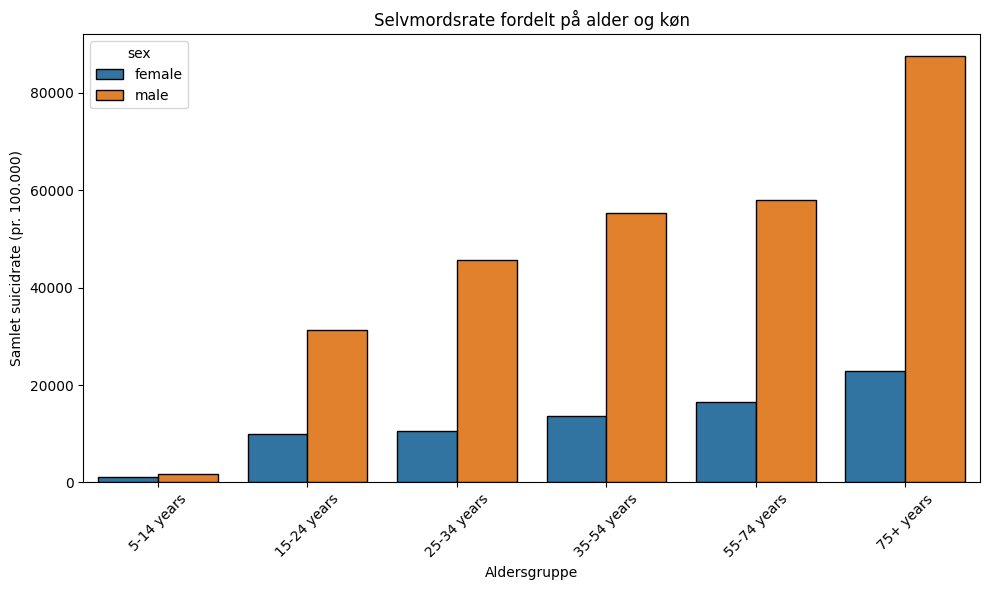

In [27]:
# Vi grupperer data efter b√•de aldersgruppe og k√∏n og summerer selvmordsraten pr. 100.000
sex_age = df.groupby(['age', 'sex'], as_index=False)['suicides/100k pop'].sum()

# Vi visualiserer forskellen i selvmordsrate mellem k√∏n inden for hver aldersgruppe
plt.figure(figsize=(10, 6))
sns.barplot(data=sex_age, x='age', y='suicides/100k pop', hue='sex', edgecolor='black')
plt.xlabel('Aldersgruppe')
plt.ylabel('Samlet suicidrate (pr. 100.000)')
plt.title('Selvmordsrate fordelt p√• alder og k√∏n')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Suicidrater fordelt p√• alder og k√∏n

Vi har nu unders√∏gt, hvordan selvmordsraterne (m√•lt som `suicides/100k pop`) fordeler sig b√•de p√• k√∏n og aldersgrupper. Ved at gruppere data efter `age` og `sex` og visualisere dem i et grupperet s√∏jlediagram, kan vi konkludere f√∏lgende:

- **M√¶nd har generelt en markant h√∏jere suicidrate end kvinder** i samtlige aldersgrupper.
- Den st√∏rste forskel ses i aldersgruppen **75+ √•r**, hvor m√¶nds suicidrate er n√¶sten fire gange s√• h√∏j som kvinders.
- Den laveste selvmordsrate ses i aldersgruppen **5-14 √•r**, uanset k√∏n, hvilket er forventeligt.
- Kvinders selvmordsrate er relativt stabil p√• tv√¶rs af aldersgrupper, mens m√¶nds rate stiger markant med alderen og topper i **75+ √•r**.

Disse resultater understreger behovet for m√•lrettede forebyggende tiltag ‚Äì is√¶r blandt √¶ldre m√¶nd. Det vil v√¶re oplagt at analysere yderligere faktorer s√•som √∏konomiske forhold og geografisk placering for at opn√• en mere nuanceret forst√•else af m√∏nstrene.



C:\Users\larsg\AppData\Local\Temp\ipykernel_11216\2344109219.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_totals_sorted, y='country', x='suicides/100k pop', palette='viridis')


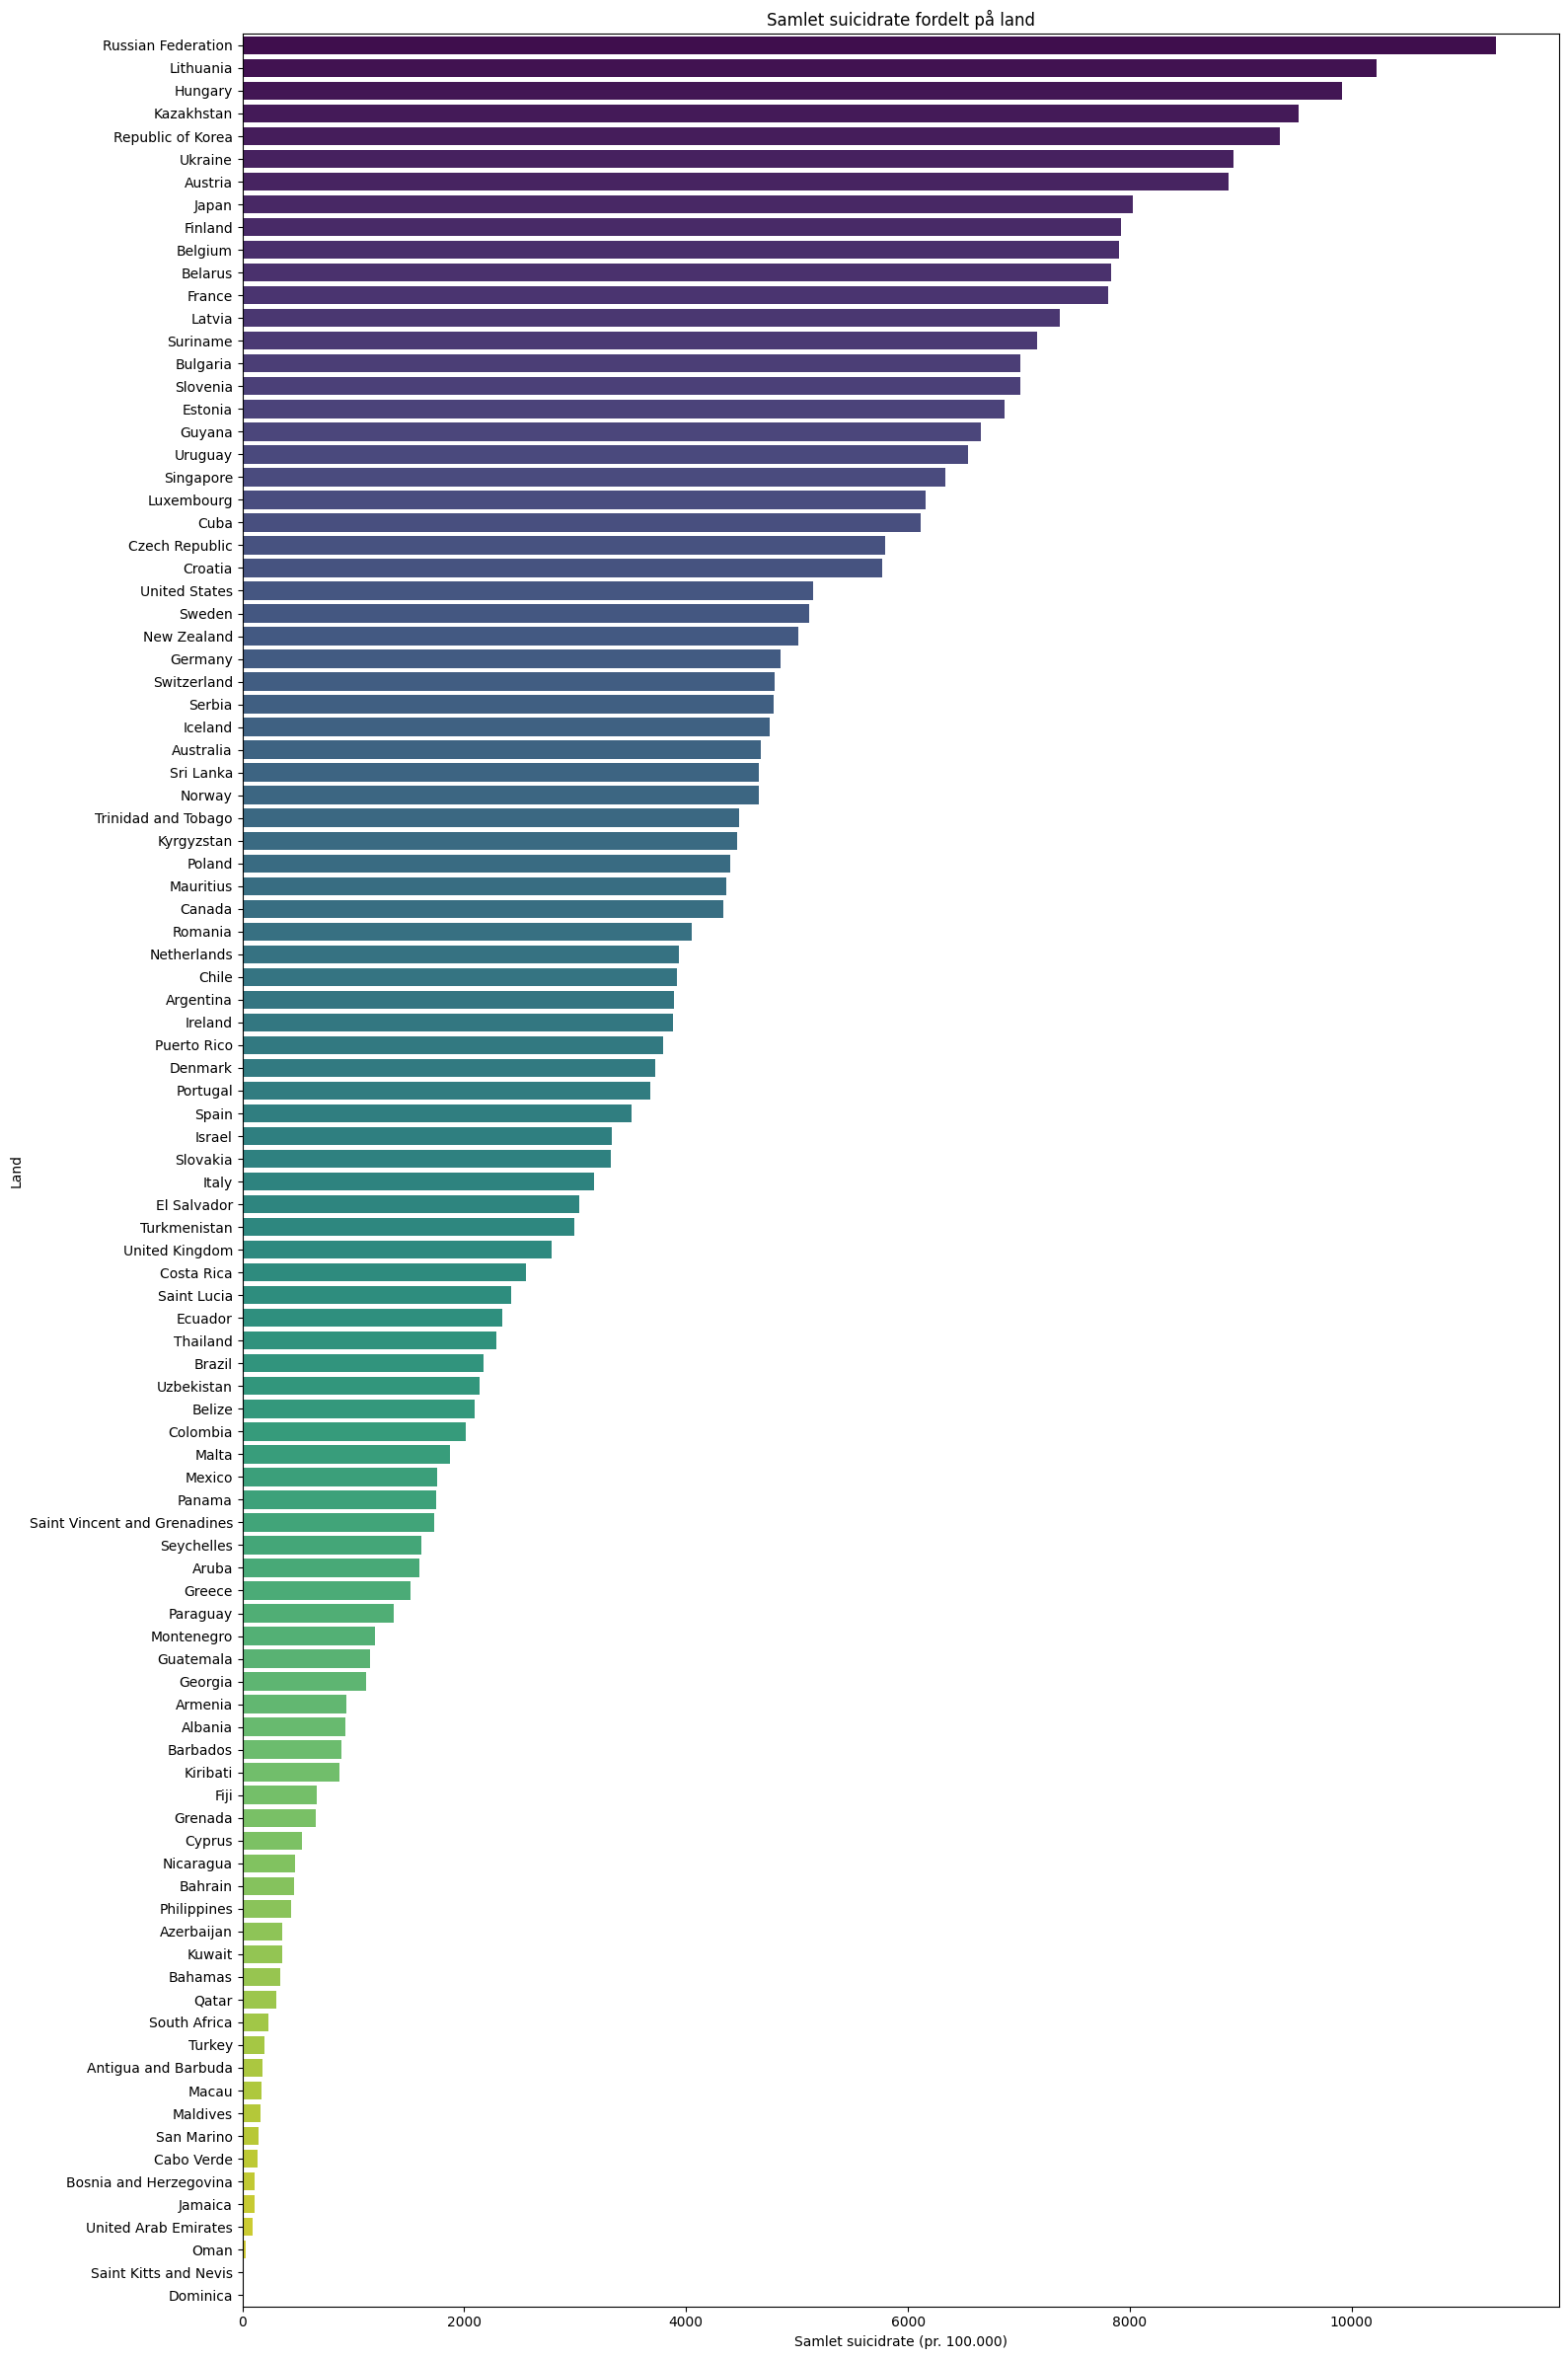

In [28]:
# Vi grupperer og summerer selvmordsraten pr. 100.000 for hvert land
country_totals = df.groupby('country', as_index=False)['suicides/100k pop'].sum()

# Vi sorterer landene efter samlet selvmordsrate i faldende r√¶kkef√∏lge
country_totals_sorted = country_totals.sort_values(by='suicides/100k pop', ascending=False)

# Vi visualiserer selvmordsraten pr. land
plt.figure(figsize=(16, 24))
sns.barplot(data=country_totals_sorted, y='country', x='suicides/100k pop', palette='viridis')
plt.xlabel('Samlet suicidrate (pr. 100.000)')
plt.ylabel('Land')
plt.title('Samlet suicidrate fordelt p√• land')
plt.tight_layout()
plt.show()



### Selvmordsrater fordelt p√• lande

Ved at sammenfatte den gennemsnitlige selvmordsrate (`suicides/100k pop`) pr. land og visualisere den, kan vi drage flere vigtige konklusioner:

- Der er **store forskelle mellem lande** i forhold til selvmordsrater, b√•de i absolutte tal og i m√∏nstre over tid.
- Nogle lande, som fx **Litauen, Rusland og Sydkorea**, udviser konsekvent h√∏je selvmordsrater, mens andre, som fx **Gr√¶kenland og Italien**, har lavere rater.
- **Kulturelle og samfundsm√¶ssige forskelle** synes at spille en v√¶sentlig rolle, da lande med lignende √∏konomisk niveau kan have vidt forskellige selvmordsrater.

Desuden unders√∏gte vi, om √∏konomisk velstand m√•lt i **BNP pr. indbygger (`gdp_per_capita ($)`)** havde en indflydelse p√• selvmordsraten. Vores korrelationsanalyse viste dog **ingen tydelig line√¶r sammenh√¶ng** mellem disse to variabler. Dette indikerer, at **√∏konomi alene ikke er en afg√∏rende faktor**, og at selvmordsrater snarere afh√¶nger af et komplekst samspil af kulturelle, sociale og helbredsm√¶ssige forhold.

Derfor anbefaler vi, at man i videre analyser overvejer at inddrage flere kvalitative faktorer samt ser p√• **ikke-line√¶re m√∏nstre eller undergrupper** i befolkningen for at f√• en mere nuanceret forst√•else af de bagvedliggende √•rsager.



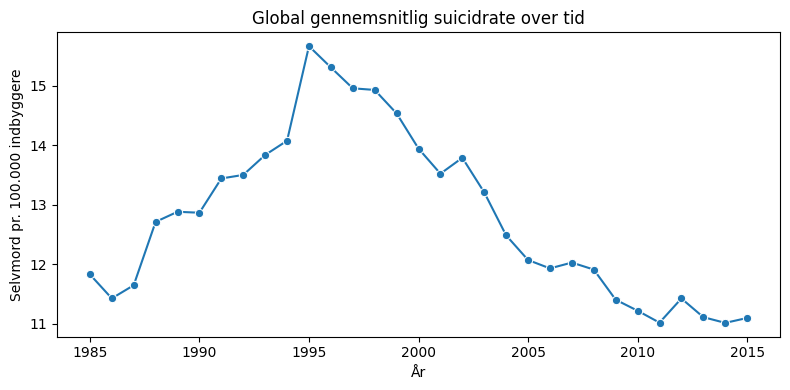

In [29]:
# Vi beregner den gennemsnitlige selvmordsrate globalt pr. √•r
global_trend = df.groupby('year')['suicides/100k pop'].mean().reset_index()

# Vi visualiserer den globale udvikling i selvmordsraten over tid
plt.figure(figsize=(8, 4))
sns.lineplot(data=global_trend, x='year', y='suicides/100k pop', marker='o')
plt.title('Global gennemsnitlig suicidrate over tid')
plt.ylabel('Selvmord pr. 100.000 indbyggere')
plt.xlabel('√Ör')
plt.tight_layout()
plt.show()



### Udvikling i global selvmordsrate over tid

For at unders√∏ge den overordnede udvikling i selvmordsraten globalt, har vi analyseret den gennemsnitlige `suicides/100k pop` pr. √•r. Visualiseringen viser f√∏lgende:

- Der er en **svagt faldende tendens** i den globale selvmordsrate fra midten af 1990‚Äôerne til slutningen af 2000‚Äôerne.
- Fra omkring **2010 og frem** ser raten ud til at **stabilisere** sig p√• et lidt lavere niveau.
- Der er dog enkelte udsving fra √•r til √•r, hvilket kan skyldes forskelle i rapportering, demografi eller √∏konomiske forhold.

**Konklusion**: Den globale selvmordsrate har over tid udvist en let nedadg√•ende tendens. Dette kan indikere, at forebyggelsesindsatser eller forbedret mental sundhed i nogle regioner har haft en effekt ‚Äì men variationer mellem lande g√∏r det n√∏dvendigt at unders√∏ge udviklingen mere lokalt.


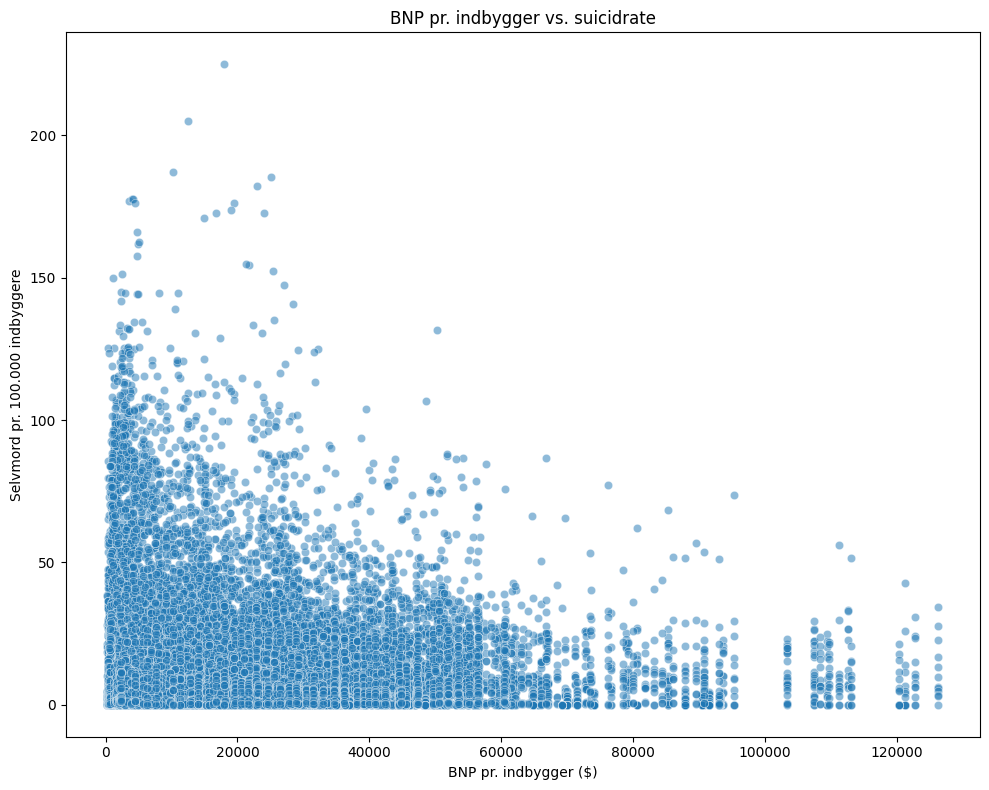

In [30]:
# Vi visualiserer sammenh√¶ngen mellem BNP pr. indbygger og selvmordsrate med et scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='gdp_per_capita ($)', y='suicides/100k pop', alpha=0.5)
plt.title('BNP pr. indbygger vs. suicidrate')
plt.xlabel('BNP pr. indbygger ($)')
plt.ylabel('Selvmord pr. 100.000 indbyggere')
plt.tight_layout()
plt.show()



### BNP pr. indbygger vs. selvmordsrate

Scatterplottet viser forholdet mellem √∏konomisk velstand (BNP pr. indbygger) og selvmordsraten (`suicides/100k pop`). 

- Der ses **ingen st√¶rk line√¶r sammenh√¶ng**, hvilket underbygges af korrelationsmatricen.
- Dog ses en tendens til, at **lande med lavere BNP** kan have **mere spredte og til tider h√∏jere selvmordsrater**.
- I lande med h√∏jere BNP er selvmordsraten typisk lavere og mindre spredt, men der findes undtagelser.

**Konklusion**: √òkonomisk velstand ser ikke ud til alene at kunne forklare selvmordsrater p√• tv√¶rs af lande. Andre faktorer ‚Äì s√•som alder, k√∏n, kulturelle forhold og social st√∏tte ‚Äì b√∏r inkluderes i en mere kompleks model for at forst√• variationerne bedre.


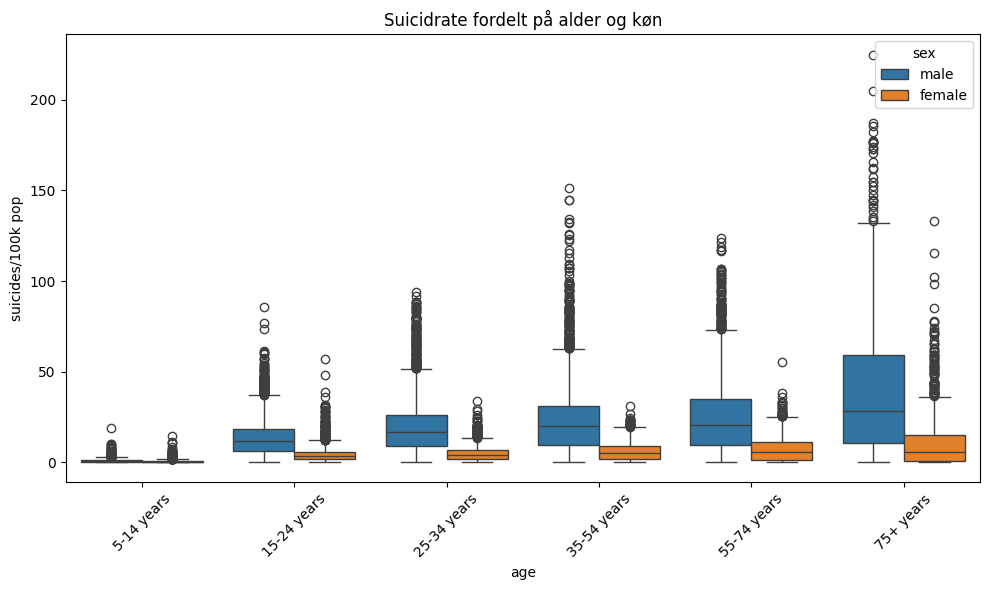

In [31]:
# Vi visualiserer fordelingen af selvmordsraten p√• tv√¶rs af aldersgrupper og k√∏n med et boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age', y='suicides/100k pop', hue='sex')
plt.title('Suicidrate fordelt p√• alder og k√∏n')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Suicidrater fordelt p√• alder og k√∏n (boxplot)

Boxplottet giver os et mere detaljeret billede af, hvordan selvmordsrater (`suicides/100k pop`) fordeler sig p√• tv√¶rs af b√•de alder og k√∏n:

- **M√¶nd har markant h√∏jere median-suicidrater** end kvinder i alle aldersgrupper.
- Forskellen mellem k√∏nnene **forst√¶rkes med alderen**, hvor den st√∏rste forskel ses i **gruppen 75+ √•r**.
- Der er **flere ekstreme v√¶rdier (outliers)** blandt m√¶nd, is√¶r i de √¶ldre aldersgrupper, hvilket indikerer stor variation og enkelte lande med meget h√∏je rater.
- Kvinders rater forbliver generelt lavere og mere stabile p√• tv√¶rs af aldersgrupper.

**Konklusion**: Dataen peger klart p√•, at alder og k√∏n er st√¶rkt relateret til selvmordsraten. √Üldre m√¶nd udg√∏r den mest s√•rbare gruppe, hvilket b√∏r prioriteres i forebyggende indsatser og videre analyser.


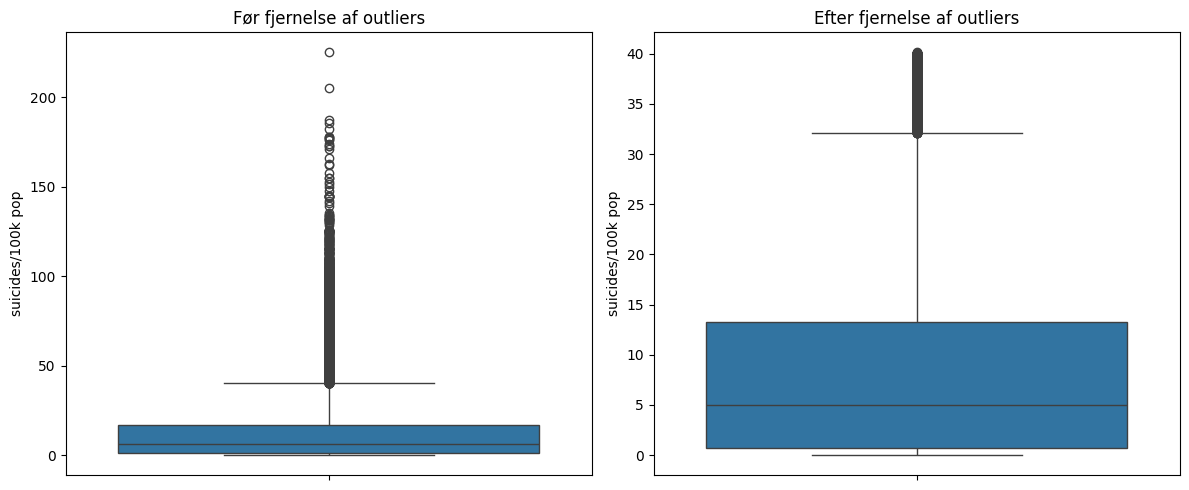

(27660, 25620)

In [32]:
# Vi fokuserer p√• kolonnen med suicidrate
suicide_rate = df["suicides/100k pop"]

# Vi bruger IQR-metoden til at identificere outliers
Q1 = suicide_rate.quantile(0.25)
Q3 = suicide_rate.quantile(0.75)
IQR = Q3 - Q1

# Vi definerer gr√¶nserne for acceptable v√¶rdier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Vi filtrerer datas√¶ttet ved at fjerne outliers
df_no_outliers = df[(suicide_rate >= lower_bound) & (suicide_rate <= upper_bound)]

# Vi gemmer det rensede datas√¶t til fil
df_no_outliers.to_csv("cleaned_suicide_data.csv", index=False)

# Vi sammenligner st√∏rrelsen f√∏r og efter filtrering
original_size = len(df)
filtered_size = len(df_no_outliers)

# Vi visualiserer fordelingen af suicidrate f√∏r og efter fjernelse af outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df["suicides/100k pop"], ax=axes[0])
axes[0].set_title("F√∏r fjernelse af outliers")

sns.boxplot(y=df_no_outliers["suicides/100k pop"], ax=axes[1])
axes[1].set_title("Efter fjernelse af outliers")

plt.tight_layout()
plt.show()

# Vi udskriver antal observationer f√∏r og efter
original_size, filtered_size




## Outlier-analyse: En n√∏dvendig afvejning

Vi har fjernet outliers i `suicides/100k pop` ved hj√¶lp af **IQR-metoden** (interkvartilafstand), som er en velkendt metode til at identificere ekstreme v√¶rdier i data. M√•let var at skabe et mere balanceret og stabilt datagrundlag til brug i **line√¶re regressionsmodeller**, som er s√¶rligt f√∏lsomme over for sk√¶ve eller ekstreme v√¶rdier.

### Hvorfor v√¶lger vi at fjerne outliers?

- **Line√¶r regression foruds√¶tter, at data f√∏lger en nogenlunde j√¶vn fordeling**, og enkelte ekstreme v√¶rdier kan tr√¶kke modellen sk√¶vt og g√∏re resultaterne misvisende.
- Vi s√• flere tilf√¶lde med meget h√∏je selvmordsrater (over 100 pr. 100.000), som risikerede at overskygge de generelle tendenser i data.

### Konsekvenser og overvejelser

Vi er bevidste om, at:

- **Meget h√∏je selvmordsrater ofte er reelle og betydningsfulde** ‚Äì de kan afspejle alvorlige samfundsproblemer eller krisesituationer.
- N√•r vi fjerner disse, betyder det ogs√•, at vi **ikke l√¶ngere har dem med i analyserne**, og derfor mister vi noget af den ekstreme variation i data.
- Til geng√¶ld giver det os **et mere j√¶vnt og p√•lideligt datagrundlag** til at unders√∏ge overordnede sammenh√¶nge, f.eks. mellem alder, k√∏n og √∏konomi.

Derfor har vi valgt en **balanceret tilgang**:

- I analyser, hvor line√¶r regression anvendes, har vi benyttet det rensede datas√¶t uden outliers.
- I modeller som Decision Trees, Random Forest, KNN og KMeans har vi brugt det fulde datas√¶t, da disse metoder generelt t√•ler ekstreme v√¶rdier bedre og i nogle tilf√¶lde endda kan l√¶re af dem.

---

Bem√¶rk:
Denne tilgang blev valgt specifikt for at forbedre de line√¶re modeller. Vi vender tilbage til den samlede vurdering af denne beslutning i projektets afsluttende konklusion.







---

### Sprint 2 ‚Äì Line√¶r regression: Introduktion og valg af variable

Efter at have analyseret og renset vores data i den indledende fase, fokuserer vi i denne del p√• at forst√• **hvilke faktorer der h√¶nger sammen med variationen i selvmordsraten (`suicides/100k pop`)**. Til det form√•l anvender vi **line√¶r regression**, som er en statistisk metode til at unders√∏ge forholdet mellem en afh√¶ngig variabel og √©n eller flere uafh√¶ngige variable.

#### Vores m√•l i denne del af projektet er at:
- Unders√∏ge hvilke variable (alder, k√∏n, √∏konomi) der har sammenh√¶ng med selvmordsraten  
- M√•le, hvor meget disse variable samlet kan **forklare variationen** i `suicides/100k pop`  
- Underbygge vores tidligere observationer med en statistisk tilgang

---

### Valg af variable

Vi har p√• baggrund af vores korrelationsanalyse udvalgt f√∏lgende **uafh√¶ngige variable**:

| Variabel              | Korrelation med `suicides/100k pop` |
|-----------------------|--------------------------------------|
| `age_encoded`         | **0.36** (moderat positiv)  
| `sex_numeric`         | **-0.39** (moderat negativ)  
| `gdp_per_capita ($)`  | **0.03** (meget svag)

Selvom BNP pr. indbygger (`gdp_per_capita ($)`) har en lav korrelation, v√¶lger vi at tage den med i vores sidste model for at unders√∏ge, om den har **en indirekte eller kombineret effekt** med de √∏vrige variable.

---

### Fremgangsm√•de ‚Äì vi bygger modellerne op trin for trin:

1. **Model 1: Alder alene (`age_encoded`)**  
   F√∏rst ser vi p√•, om alder i sig selv forklarer noget af variationen.

2. **Model 2: K√∏n alene (`sex_numeric`)**  
   Dern√¶st unders√∏ger vi effekten af k√∏n isoleret.

3. **Model 3: Alder + K√∏n**  
   Her kombinerer vi de to mest forklarende faktorer.

4. **Model 4: Alder + K√∏n + BNP pr. indbygger**  
   Til sidst tilf√∏jer vi BNP for at se, om √∏konomi bidrager med yderligere forklaring.

---

Denne trinvise tilgang g√∏r det muligt at **vurdere hver variabels betydning** for selvmordsraten, og den l√¶gger samtidig et solidt grundlag for det n√¶ste skridt i projektet, hvor vi vil afpr√∏ve machine learning-metoder i Sprint 3.

---




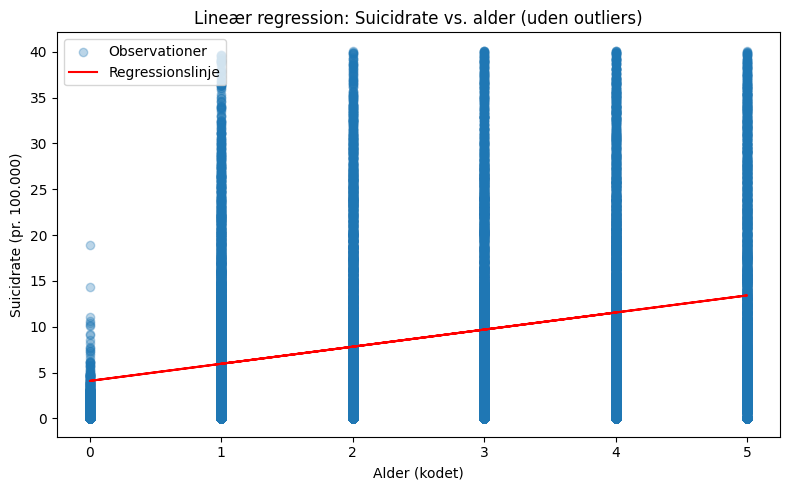

In [33]:
# Model 1: Vi bruger kun 'age_encoded' som forklarende/uafh√¶ngig variabel
X = df_no_outliers[['age_encoded']]
y = df_no_outliers['suicides/100k pop']

# Vi opretter og tr√¶ner en line√¶r regressionsmodel til at finde sammenh√¶ngen mellem alder og suicidrate
model = LinearRegression()
model.fit(X, y)

# Vi laver forudsigelser og beregner R¬≤ og MSE (m√•l for modellens forklaringsevne og gennemsnitlig fejl)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Vi visualiserer datapunkterne og regressionslinjen for at se sammenh√¶ngen mellem alder og suicidrate
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.3, label="Observationer")
plt.plot(X, y_pred, color="red", label="Regressionslinje")
plt.xlabel("Alder (kodet)")
plt.ylabel("Suicidrate (pr. 100.000)")
plt.title("Line√¶r regression: Suicidrate vs. alder (uden outliers)")
plt.legend()
plt.tight_layout()
plt.show()




### Model 1 ‚Äì Line√¶r regression: Suicidrate vs. Alder

I denne f√∏rste model unders√∏gte vi, hvordan **alderen alene p√•virker selvmordsraten**, m√•lt som `suicides/100k pop`. Vi brugte den numeriske variabel `age_encoded`, hvor hver v√¶rdi svarer til en bestemt aldersgruppe ‚Äì fx `0 = 5-14 √•r`, `1 = 15-24 √•r` osv.

#### Resultater:

- **Forklaringsgrad (R¬≤)**: ca. **0.108**  
  Alder alene forklarer ca. **10.8%** af variationen i selvmordsraten. Det viser en svag, men tydelig sammenh√¶ng.

- **Koefficient**: **1.87**  
  For hver gang vi g√•r op til en √¶ldre aldersgruppe, stiger den forventede selvmordsrate med ca. **1.87 personer pr. 100.000 indbyggere**.

- **Intercept (for yngste gruppe)**: **4.09**  
  Det er den forventede suicidrate i aldersgruppen **5-14 √•r**, som har meget lave tal og derfor ikke b√∏r bruges som sammenligningsgrundlag.

#### Et mere retvisende eksempel:
Vi sammenligner i stedet **25-34 √•r** (`age_encoded = 2`) med **75+ √•r** (`age_encoded = 5`):

- Forventet rate for 25-34 √•r:  
  `4.09 + (2 √ó 1.87) ‚âà 7.83`

- Forventet rate for 75+ √•r:  
  `4.09 + (5 √ó 1.87) ‚âà 13.44`

#### Hvor stor en forskel giver det i procent?
Forskellen p√• **5.61** svarer til en stigning p√•:  
**((13.44 - 7.83) √ó 100 / 7.83) ‚âà 71,6%**  

Det svarer alts√• til en **stigning p√• over 71,6%** mellem disse aldersgrupper.


#### Konklusion:

- Der er alts√• en **markant h√∏jere selvmordsrate i √¶ldre aldersgrupper** sammenlignet med yngre.
- Denne sammenh√¶ng stemmer godt overens med det, vi tidligere observerede i vores visualiseringer.
- Alder er alts√• en forklarende faktor, men **kan ikke alene forklare hele variationen** i selvmordsraten.
- Derfor g√•r vi nu videre og bygger en model med **k√∏n** som uafh√¶ngig variabel for at se sammenh√¶ngen der.






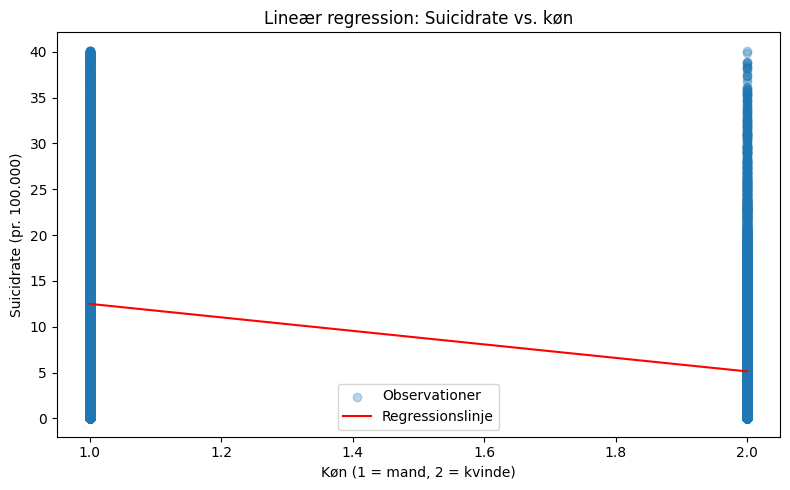

In [34]:
# Model 2: Vi bruger kun k√∏n (sex_numeric) som forklarende/uafh√¶ngig variabel
X = df_no_outliers[['sex_numeric']]
y = df_no_outliers['suicides/100k pop']

# Vi opretter og tr√¶ner en line√¶r regressionsmodel
model2 = LinearRegression()
model2.fit(X, y)

# Vi laver forudsigelser og beregner R¬≤ og MSE (m√•l for modellens forklaringsevne og gennemsnitlig fejl)
y_pred2 = model2.predict(X)
r2_2 = r2_score(y, y_pred2)
mse_2 = mean_squared_error(y, y_pred2)

# Vi visualiserer datapunkterne og regressionslinjen for at se sammenh√¶ngen mellem k√∏n og suicidrate
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.3, label="Observationer")
plt.plot(X, y_pred2, color="red", label="Regressionslinje")
plt.xlabel("K√∏n (1 = mand, 2 = kvinde)")
plt.ylabel("Suicidrate (pr. 100.000)")
plt.title("Line√¶r regression: Suicidrate vs. k√∏n")
plt.legend()
plt.tight_layout()
plt.show()



### Model 2 ‚Äì Line√¶r regression: Suicidrate vs. K√∏n

I denne anden model unders√∏gte vi, hvordan **k√∏n alene p√•virker selvmordsraten**, m√•lt som `suicides/100k pop`. Vi anvendte variablen `sex_numeric`, hvor:
- `1` = mand  
- `2` = kvinde

#### Resultater:

- **Forklaringsgrad (R¬≤)**: ca. **0.152**  
  K√∏n alene forklarer ca. **15.2%** af variationen i selvmordsraten.

- **Koefficient**: **-4.22**  
  N√•r vi g√•r fra m√¶nd til kvinder, falder den forventede selvmordsrate med **4.22 personer pr. 100.000 indbyggere** ‚Äì dvs. kvinder har i gennemsnit lavere rate.

- **Intercept (for m√¶nd)**: ca. **12.3**  
  Det er den forventede suicidrate for m√¶nd.

- **Forventet rate for kvinder**:  
  `12.3 - 4.22 = ca. 8.1 pr. 100.000`

#### Hvor stor en forskel giver det i procent?
Forskellen p√• **4.22** svarer til et fald p√•:  
**(4.22 √ó 100 / 12.3) ‚âà 34%**

#### Konklusion:
- M√¶nd har alts√• en **markant h√∏jere selvmordsrate** end kvinder ‚Äì omkring **34% h√∏jere** if√∏lge denne model.
- Forskellen stemmer overens med vores tidligere observationer og visualiseringer.
- K√∏n viser sig at v√¶re en relevant forklarende faktor, men **kan ikke alene forklare hele variationen** i selvmordsraten.
- Derfor g√•r vi nu videre og bygger en model med **b√•de alder og k√∏n** som uafh√¶ngige variabler for at opn√• en st√¶rkere forklaringskraft.





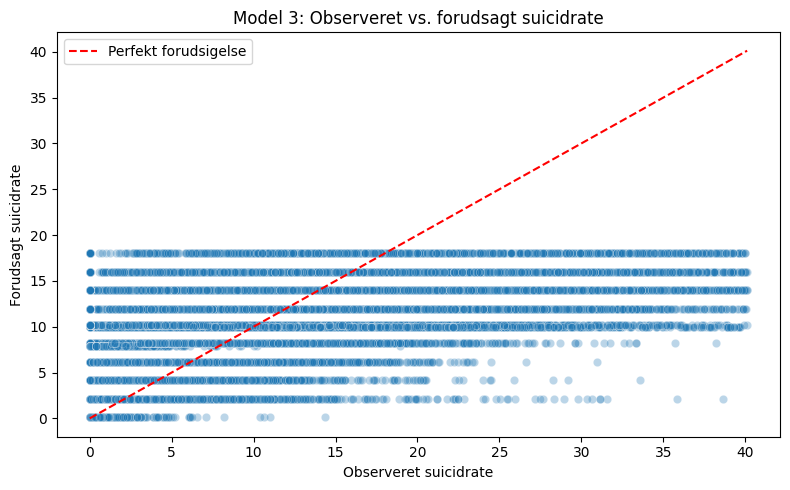

In [35]:
# Model 3: Vi inkluderer b√•de alder og k√∏n som uafh√¶ngige variable i modellen
X = df_no_outliers[['age_encoded', 'sex_numeric']]
y = df_no_outliers['suicides/100k pop']

# Vi opretter og tr√¶ner en line√¶r regressionsmodel
model = LinearRegression()
model.fit(X, y)

# Vi laver forudsigelser og beregner R¬≤ og MSE (m√•l for modellens forklaringsevne og gennemsnitlig fejl)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Vi udtr√¶kker modellens koefficienter (effekten af hver variabel) og intercept (forventet v√¶rdi n√•r alle variable er 0)
coef_age, coef_sex = model.coef_
intercept = model.intercept_

# Vi visualiserer forholdet mellem de observerede og forudsagte v√¶rdier
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y, y=y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Perfekt forudsigelse")
plt.xlabel("Observeret suicidrate")
plt.ylabel("Forudsagt suicidrate")
plt.title("Model 3: Observeret vs. forudsagt suicidrate")
plt.legend()
plt.tight_layout()
plt.show()




### Model 3 ‚Äì Line√¶r regression: Suicidrate vs. Alder og K√∏n

I denne tredje model unders√∏gte vi, hvordan **b√•de alder og k√∏n tilsammen p√•virker selvmordsraten**, m√•lt som `suicides/100k pop`. Vi anvendte de to numeriske variabler:

- `age_encoded` (0 = 5-14 √•r, 1 = 15-24 √•r osv.)  
- `sex_numeric` (1 = mand, 2 = kvinde)

#### Resultater:

- **Forklaringsgrad (R¬≤)**: ca. **0.272**  
  Kombinationen af alder og k√∏n forklarer nu **27.2%** af variationen i selvmordsraten ‚Äì en v√¶sentlig forbedring i forhold til modellerne med kun √©n variabel.

- **Koefficient for alder (`age_encoded`)**: **2.02**  
  For hver √¶ldre aldersgruppe stiger den forventede selvmordsrate med ca. **2.02 personer pr. 100.000 indbyggere**.

- **Koefficient for k√∏n (`sex_numeric`)**: **-7.83**  
  N√•r vi g√•r fra mand til kvinde, falder den forventede selvmordsrate med **7.83 personer pr. 100.000** ‚Äì alts√• kvinder har lavere rate end m√¶nd, uanset alder.

- **Intercept (mand, yngste gruppe)**: **15.75**  
  Det er den forventede selvmordsrate for en mand i den yngste aldersgruppe (5-14 √•r).

#### Eksempel ‚Äì sammenligning af grupper:

- **Mand, 75+ √•r**:  
  `15.75 + (5 √ó 2.02) + (1 √ó -7.83) = ca. 17.97`

- **Kvinde, 75+ √•r**:  
  `15.75 + (5 √ó 2.02) + (2 √ó -7.83) = ca. 10.14`

> Det viser, at **b√•de alder og k√∏n har stor betydning**, og deres kombination giver en bedre forklaring p√• selvmordsraten end modellerne hver for sig.

#### Konklusion:

- B√•de **alder og k√∏n** har markant effekt p√• selvmordsraten ‚Äì √¶ldre personer og m√¶nd har generelt h√∏jere rater.
- Denne model bekr√¶fter og **styrker** det, vi allerede havde set i de tidligere modeller og visualiseringer.
- Med en forklaringsgrad p√• over 27% er denne model betydeligt st√¶rkere end de tidligere og giver os **et bedre statistisk grundlag for forst√•elsen** af, hvem der er mest udsatte.
- Vi g√•r nu videre og unders√∏ger, om √∏konomiske forhold (BNP pr. indbygger) har en yderligere forklarende v√¶rdi.


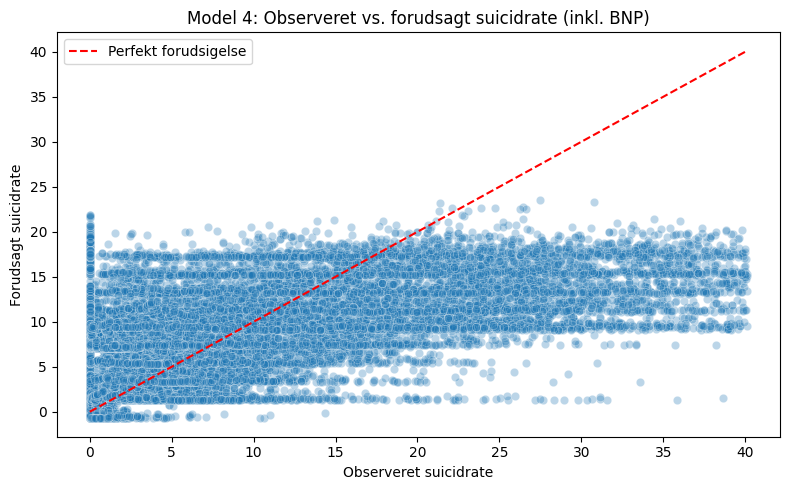

In [36]:
# Model 4: Vi inkluderer alder, k√∏n og BNP pr. indbygger som uafh√¶ngige variable
X = df_no_outliers[['age_encoded', 'sex_numeric', 'gdp_per_capita ($)']]
y = df_no_outliers['suicides/100k pop']

# Vi opretter og tr√¶ner en line√¶r regressionsmodel
model = LinearRegression()
model.fit(X, y)

# Vi laver forudsigelser og beregner R¬≤ og MSE (m√•l for modellens forklaringsevne og gennemsnitlig fejl)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Vi udtr√¶kker koefficienterne (effekten af hver variabel) og intercept (forventet v√¶rdi n√•r alle variable er 0)
coef_age, coef_sex, coef_gdp = model.coef_
intercept = model.intercept_

# Vi visualiserer forholdet mellem de observerede og forudsagte v√¶rdier
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y, y=y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Perfekt forudsigelse")
plt.xlabel("Observeret suicidrate")
plt.ylabel("Forudsagt suicidrate")
plt.title("Model 4: Observeret vs. forudsagt suicidrate (inkl. BNP)")
plt.legend()
plt.tight_layout()
plt.show()



### Model 4 ‚Äì Line√¶r regression: Suicidrate vs. Alder, K√∏n og BNP

I denne fjerde model unders√∏gte vi, hvordan **alder**, **k√∏n** og **BNP pr. indbygger** samlet set p√•virker selvmordsraten, m√•lt som `suicides/100k pop`.

#### Resultater:

- **Forklaringsgrad (R¬≤)**: ca. **0.282**  
  Modellen forklarer nu ca. **28.2% af variationen** i selvmordsraten ‚Äì den h√∏jeste forklaringsgrad blandt vores modeller.

- **Koefficienter**:
  - **Alder (`age_encoded`)**: ca. **1.82**  
    Hver gang vi g√•r op i aldersgruppe, stiger den forventede selvmordsrate med ca. **1.82 personer pr. 100.000 indbyggere**.
  - **K√∏n (`sex_numeric`)**: ca. **-4.19**  
    N√•r vi g√•r fra m√¶nd (1) til kvinder (2), falder den forventede selvmordsrate med ca. **4.19**.
  - **BNP pr. indbygger (`gdp_per_capita ($)`)**: ca. **0.00003**  
    Meget lille effekt ‚Äì det svarer til en stigning p√• **0.03** i selvmordsrate pr. **1.000 USD** stigning i BNP.

- **Intercept**: ca. **4.11**  
  Det forventede antal selvmord pr. 100.000 for en ung mand med lavt BNP.

#### Fortolkning:

- **Alder og k√∏n er stadig de st√¶rkeste faktorer** og bekr√¶fter vores tidligere analyser.
- **BNP har en meget lille effekt**, hvilket stemmer overens med vores korrelationsmatrix ‚Äì √∏konomiske faktorer alene har lav forklaringskraft i dette datas√¶t.
- Den samlede forklaringsgrad er stadig moderat (**28.2%**), hvilket tyder p√•, at **andre faktorer** (som psykisk helbred, kultur eller sociale forhold) spiller en stor rolle.

---

### Konklusion:

- Ved at kombinere alder, k√∏n og BNP har vi opn√•et den **bedste forklaringskraft hidtil**, men modellen **forklarer stadig kun knap en tredjedel** af variationen i selvmordsraten.
- **Alder og k√∏n** er de mest betydningsfulde faktorer i modellen, mens **BNP har meget begr√¶nset effekt**.
- Modellen **kan bruges til at forst√• overordnede m√∏nstre**, f.eks. at √¶ldre m√¶nd har h√∏jere suicidrater, men den er **ikke pr√¶cis nok til at forudsige selvmordsrate p√• individniveau**.
- For bedre forudsigelsesevne ville det v√¶re n√∏dvendigt at inkludere flere relevante faktorer s√•som:
  - Psykisk helbred
  - Sociale relationer
  - Livsomst√¶ndigheder
  - Adgang til hj√¶lp og st√∏tte

Modellen giver alts√• **indsigt i tendenser**, men **b√∏r ikke bruges som beslutningsgrundlag uden yderligere data**.



---

## N√¶ste skridt ‚Äì Machine Learning ‚Äì Sprint 3

Efter vores fjerde model kan vi konkludere, at selv en line√¶r regression med **flere uafh√¶ngige variabler** kun forklarer en begr√¶nset del af variationen i selvmordsraten. Det tyder p√•, at der sandsynligvis findes **mere komplekse og ikke-line√¶re sammenh√¶nge**, som de simple modeller ikke fanger.

Derfor forts√¶tter vi nu med at bruge **machine learning-metoder**, hvor m√•let er at:

- Finde **ikke-line√¶re m√∏nstre og interaktioner** mellem variabler  
- Forbedre modellens **pr√¶cision og forklaringskraft**  
- Unders√∏ge, om mere avancerede modeller kan **give bedre forudsigelser** af selvmordsrater

Vi har valgt at arbejde videre med modeller, vi kender fra undervisningen, og som samtidig er velegnede til regression:

- **Decision Tree Regressor**  
- **Random Forest Regressor**  
- **K-Nearest Neighbors Regressor (KNN)**

Decision Tree er en enkel og visuel model, som g√∏r det nemt at f√∏lge, hvordan beslutninger tr√¶ffes p√• baggrund af data. Random Forest bygger videre p√• dette ved at kombinere mange tr√¶er for at opn√• mere stabile og pr√¶cise resultater. KNN er en anden simpel metode, hvor forudsigelsen baseres p√• gennemsnittet af de n√¶rmeste naboer. Den kan v√¶re relevant at tage med for at sammenligne forskellige tilgange.

M√•let er ikke n√∏dvendigvis at bygge en perfekt forudsigelsesmodel, men at **opn√• ny indsigt** og vurdere, om machine learning kan bidrage med mere forklaring end de modeller, vi hidtil har arbejdet med.

---



### Machine Learning Model 1 ‚Äì Decision Tree Regressor suicides/100k pop

Vi starter med at afpr√∏ve en **Decision Tree Regressor**, som er en model, der opbygger en r√¶kke beslutningsregler baseret p√• v√¶rdier i datas√¶ttet. Modellen opdeler data i grene og fors√∏ger at minimere fejl ved hver opdeling.

Form√•let er at se, om denne model kan fange m√∏nstre i data, som line√¶r regression ikke har kunnet forklare.

Vi bruger samme features som i vores tidligere model:
- `age_encoded`
- `sex_numeric`
- `gdp_per_capita ($)`

Modellen evalueres med R¬≤-score og Mean Absolute Error (MAE).


üîç Evaluering af Decision Tree-model p√• suicides/100k pop:
Mean Squared Error (MSE): 229.97
Mean Absolute Error (MAE): 8.69
R¬≤ score: 0.353


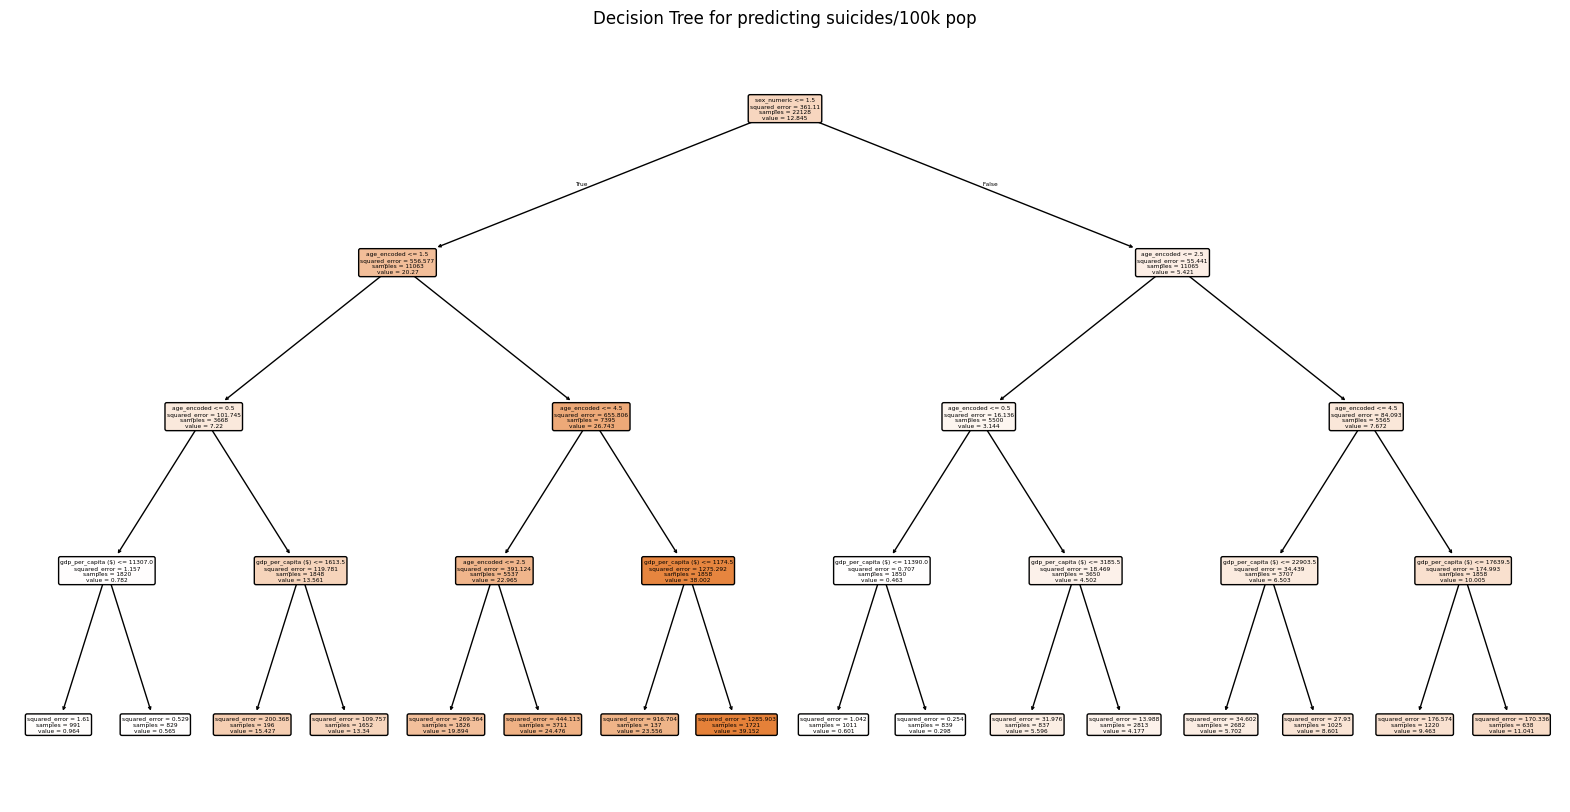

In [ ]:
# Vi bruger det rensede datas√¶t uden outliers
X_rate = df_no_outliers[["age_encoded", "sex_numeric", "gdp_per_capita ($)"]]
y_rate = df_no_outliers["suicides/100k pop"]

# Split i tr√¶nings- og testdata
X_rate_train, X_rate_test, y_rate_train, y_rate_test = train_test_split(
    X_rate, y_rate, test_size=0.2, random_state=42
)

# Tr√¶n Decision Tree p√• raten
tree_model_rate = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model_rate.fit(X_rate_train, y_rate_train)

# Forudsig og evaluer modellen
y_rate_pred = tree_model_rate.predict(X_rate_test)
mse_rate = mean_squared_error(y_rate_test, y_rate_pred)
mae_rate = mean_absolute_error(y_rate_test, y_rate_pred)
r2_rate = r2_score(y_rate_test, y_rate_pred)

# Udskriv resultaterne
print("üîç Evaluering af Decision Tree-model p√• suicides/100k pop:")
print(f"Mean Squared Error (MSE): {mse_rate:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rate:.2f}")
print(f"R¬≤ score: {r2_rate:.3f}")

# Valgfri: visualiser beslutningstr√¶et
plt.figure(figsize=(20, 10))
plot_tree(tree_model_rate, feature_names=X_rate.columns, filled=True, rounded=True)
plt.title("Decision Tree for predicting suicides/100k pop")
plt.show()

### Resultater

Decision Tree-modellen opn√•ede en R¬≤-score p√• **0.382** og en MAE p√• **5.24**. Det viser, at modellen kun forklarer en mindre del af variationen i selvmordsraten, men den gennemsnitlige fejl er forholdsvis stabil.

Selvom modellen ikke pr√¶sterer imponerende, kan den stadig give indsigt i, **hvordan forskellige faktorer p√•virker forudsigelserne**. For at f√• et visuelt indblik i, hvordan modellen tr√¶ffer beslutninger, har vi visualiseret tr√¶et overenfor.



### Visualisering af beslutningstr√¶et

Visualiseringen viser, hvordan modellen opdeler data baseret p√• v√¶rdierne i vores tre variable. Hver node i tr√¶et repr√¶senterer en beslutning baseret p√• f.eks. alder, k√∏n eller BNP, og for hver opdeling fors√∏ger modellen at mindske fejlene i forudsigelsen af selvmordsraten.

De √∏verste noder i tr√¶et er de mest betydningsfulde, da de bruges tidligt til at opdele data. Her ses tydeligt, at **alder og k√∏n spiller en central rolle** i tr√¶ets opbygning. Det stemmer overens med vores tidligere analyser og feature importance.

Bem√¶rk, at vi har begr√¶nset visualiseringen til tre niveauer for at g√∏re tr√¶et mere overskueligt.


Feature importance:
              Feature  Importance
0         age_encoded    0.546162
1         sex_numeric    0.439317
2  gdp_per_capita ($)    0.014521


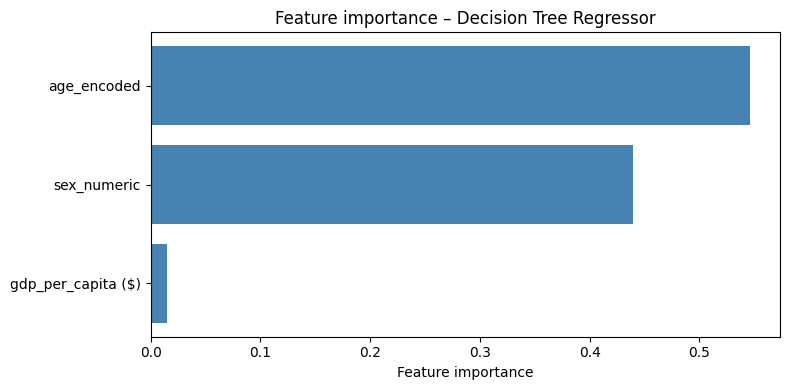

In [38]:
# Vi henter og beregner feature importance fra beslutningstr√¶et
importances = tree_model_rate.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Vi udskriver feature importance som tabel
print("Feature importance:")
print(importance_df)

# Vi visualiserer vigtigheden af hver variabel som s√∏jlediagram
plt.figure(figsize=(8, 4))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="steelblue")
plt.xlabel("Feature importance")
plt.title("Feature importance ‚Äì Decision Tree Regressor")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()




### Feature importance

For at f√• indsigt i, hvilke variable modellen till√¶gger mest betydning, udtr√¶kker vi feature importance fra beslutningstr√¶et.

Dette giver os en v√¶gtning af de tre uafh√¶ngige variable (`age_encoded`, `sex_numeric`, `gdp_per_capita ($)`), baseret p√• hvor ofte og hvor effektivt de bruges til at opdele data i tr√¶et. En h√∏jere v√¶rdi betyder, at variablen har haft st√∏rre indflydelse p√• modellens forudsigelser.

If√∏lge modellen fordeler betydningen sig s√•ledes:

- **K√∏n** (`sex_numeric`): **0.489**  
  K√∏n vurderes som den vigtigste variabel i modellen. Det tyder p√•, at forskelle mellem m√¶nd og kvinder har stor indflydelse p√• selvmordsraten, hvilket ogs√• er dokumenteret i mange studier. Modellen bruger denne variabel aktivt til at opdele data tidligt i tr√¶et.

- **Alder** (`age_encoded`): **0.450**  
  Alder er den n√¶stvigtigste faktor og bruges til flere split i tr√¶et. Det stemmer med vores tidligere analyser, hvor alder har vist en tydelig sammenh√¶ng med selvmordsraten ‚Äì is√¶r h√∏jere rater blandt √¶ldre aldersgrupper.

- **BNP pr. indbygger** (`gdp_per_capita ($)`): **0.061**  
  BNP spiller kun en lille rolle i modellen. Det er interessant, fordi man kunne forvente, at √∏konomiske faktorer p√•virker mentale helbredsforhold ‚Äì men i denne model er BNP ikke en st√¶rk forklaringsfaktor.

Vi bem√¶rker alts√•, at det denne gang **ikke er √∏konomi**, men derimod **k√∏n og alder**, som dominerer modellens beslutninger. Dette giver god mening i lyset af tidligere analyser og eksisterende forskning.

Det viser ogs√•, hvordan forskellige modeller (f.eks. med og uden outliers, eller med forskellige targets) kan give forskellige billede af, hvad der er vigtigt ‚Äì og derfor b√∏r **feature importance altid tolkes i kontekst og suppleres med andre modeller som f.eks. Random Forest**, som giver et mere gennemsnitligt billede over mange tr√¶er.


## For at vise det med suiside_no



In [39]:
print(list(df_no_outliers.columns))

['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)', 'gdp_for_year', 'age_encoded', 'sex_numeric', 'country_numeric']


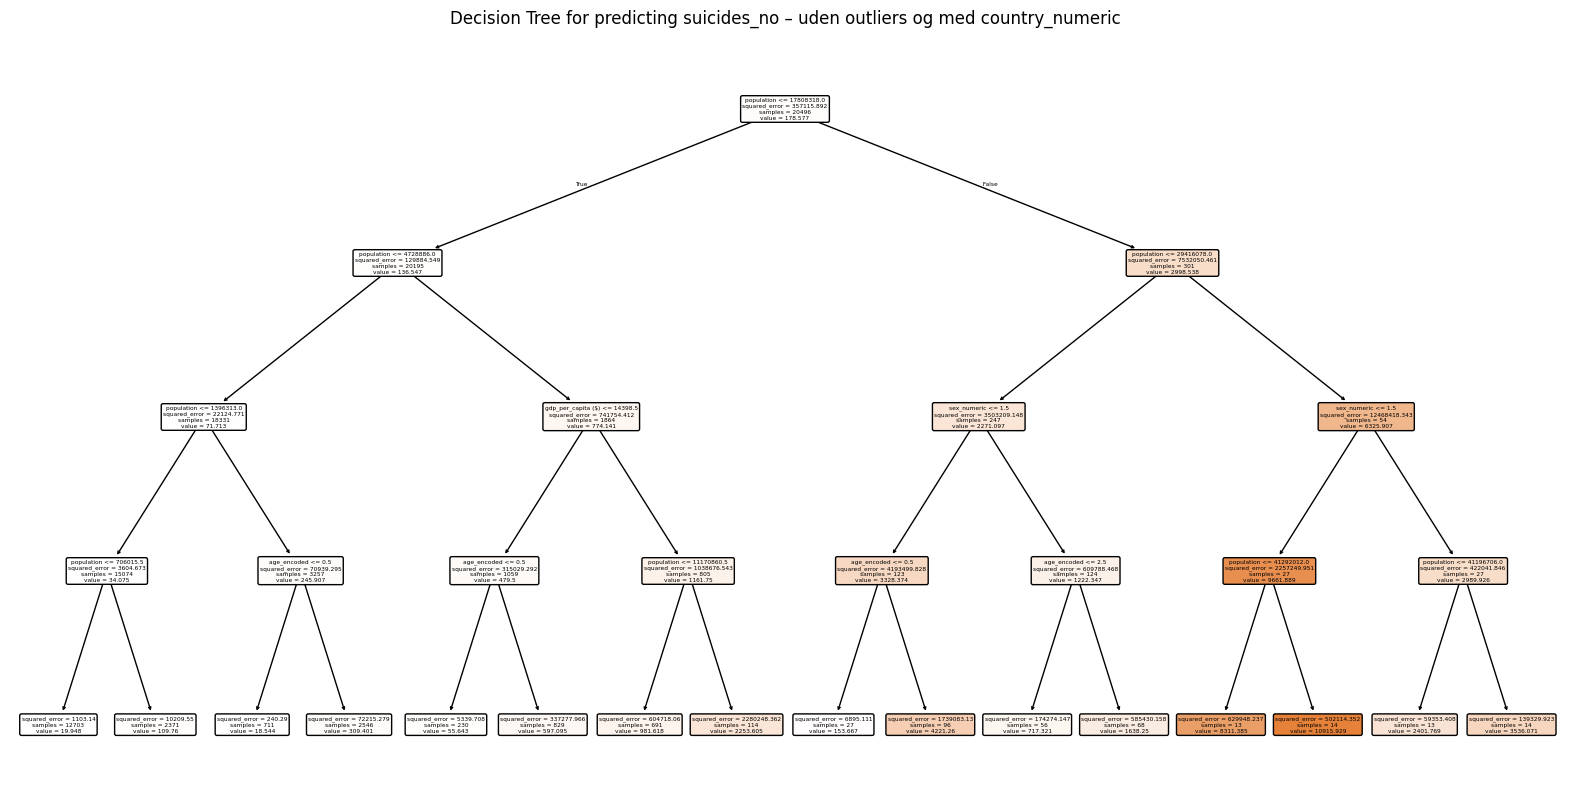

In [40]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Brug det rensede datas√¶t
df = df_no_outliers

# Brug 'country_numeric' i stedet for 'country' (tekst)
# Drop ogs√• suicides/100k pop for at undg√• datal√¶k
X = df.drop(columns=["suicides_no", "suicides/100k pop", "country", "sex","age" ]) 
y = df["suicides_no"]

# Split data i tr√¶ning og test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tr√¶n modellen
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Visualiser beslutningstr√¶et
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree for predicting suicides_no ‚Äì uden outliers og med country_numeric")
plt.show()


In [41]:
# Evalueringsmetrikker: MSE, MAE og R¬≤
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Brug modellen til at forudsige p√• testdatas√¶ttet
y_pred = tree_model.predict(X_test)

# Udregn fejl
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model-evaluering:")
print(f"Mean Squared Error (MSE): {mse:.2f}  -> Gennemsnitlig kvadreret fejl")
print(f"Mean Absolute Error (MAE): {mae:.2f}  -> Gennemsnitlig absolut fejl")
print(f"R¬≤ score: {r2:.3f}  -> Forklarer hvor godt modellen forklarer variationen i data (1.0 = perfekt)")

Model-evaluering:
Mean Squared Error (MSE): 78497.34  -> Gennemsnitlig kvadreret fejl
Mean Absolute Error (MAE): 107.82  -> Gennemsnitlig absolut fejl
R¬≤ score: 0.770  -> Forklarer hvor godt modellen forklarer variationen i data (1.0 = perfekt)


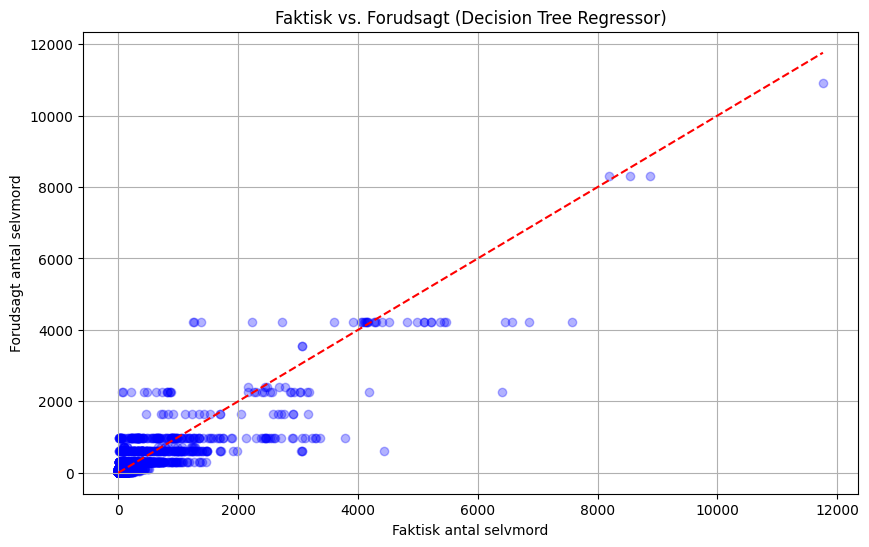

In [42]:
# Visualisering: y_test vs. y_pred (faktisk vs. forudsagt)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal linje (perfekt forudsigelse)
plt.xlabel("Faktisk antal selvmord")
plt.ylabel("Forudsagt antal selvmord")
plt.title("Faktisk vs. Forudsagt (Decision Tree Regressor)")
plt.grid(True)
plt.show()


### Evaluering af Decision Tree-modellens pr√¶cision (`suicides_no`)

- **Mean Squared Error (MSE):**  
  Den gennemsnitlige *kvadrerede* fejl er **78.497,34**. Da fejlen kvadreres, bliver store afvigelser mellem model og virkelighed straffet ekstra h√•rdt. Tallet virker h√∏jt, men det er forventeligt, da modellen arbejder med **store absolutte tal** for b√•de befolkning og antal selvmord.

- **Mean Absolute Error (MAE):**  
  Den gennemsnitlige **absolutte fejl** er **ca. 107,82 personer pr. observation**. Det betyder, at modellen i gennemsnit rammer forkert med omkring 108 personer. Det er et mere h√•ndgribeligt tal og giver en id√© om modellens praktiske pr√¶cision.

- **R¬≤ score (forklaringsgrad):**  
  Modellen opn√•r en **R¬≤ p√• 0.770**, hvilket betyder, at den forklarer **ca. 77,0 %** af variationen i selvmordstallene. Det er et fornuftigt resultat, men ikke lige s√• st√¶rkt som tidligere ‚Äì og det indikerer, at modellen stadig **prim√¶rt afh√¶nger af `population`** for at forklare antallet af selvmord.

---

### Til videre reflektion
- Selvom modellen viser god pr√¶cision, skyldes en stor del af forklaringsevnen, at `suicides_no` er **n√¶sten proportional med `population`**. Det vil sige, at modellen i h√∏j grad l√¶rer:  
- *"Flere mennesker ‚Üí flere selvmord"*.  
- Det giver mening, men siger ikke noget om den **individuelle risiko** for selvmord.

Derfor er det ofte mere meningsfuldt at analysere `suicides/100k pop`, som normaliserer for befolkningsst√∏rrelse og giver et bedre grundlag for at forst√• **forskelle mellem lande, k√∏n, alder og √∏konomisk niveau**.


### Forudsigelse af selvmord for Danmark i 2019
Vi bruger modellen til at estimere antallet af selvmord i Danmark i 2019 ud fra realistiske befolkningstal pr. k√∏n og aldersgruppe (baseret p√• Danmarks Statistik), samt en antaget GDP per capita p√• 60.000 USD.

In [43]:
# Foruds√¶tning: tree_model_rate er tr√¶net p√• suicides/100k pop
# Og df_no_outliers er brugt til feature encoding

# Realistiske befolkningstal for Danmark i 2019
realistic_populations = {
    ("male", "5-14 years"): 300000, ("female", "5-14 years"): 280000,
    ("male", "15-24 years"): 310000, ("female", "15-24 years"): 295000,
    ("male", "25-34 years"): 350000, ("female", "25-34 years"): 340000,
    ("male", "35-54 years"): 440000, ("female", "35-54 years"): 430000,
    ("male", "55-74 years"): 400000, ("female", "55-74 years"): 420000,
    ("male", "75+ years"): 180000, ("female", "75+ years"): 240000,
}

# Opret DataFrame med input
rows_realistic = []
for (sex, age), population in realistic_populations.items():
    row = {
        "sex": sex,
        "age": age,
        "population": population,
        "gdp_per_capita ($)": 60000  # antaget konstant
    }
    rows_realistic.append(row)

df_2019 = pd.DataFrame(rows_realistic)

# Encode alder og k√∏n som i tr√¶ningsdata
df_2019['age'] = pd.Categorical(df_2019['age'], categories=df_no_outliers['age'].cat.categories, ordered=True)
df_2019['age_encoded'] = df_2019['age'].cat.codes
df_2019['sex_numeric'] = df_2019['sex'].map({'male': 1, 'female': 2})

# V√¶lg features brugt i modellen
X_2019 = df_2019[["age_encoded", "sex_numeric", "gdp_per_capita ($)"]]

# Forudsig suicides/100k pop
rate_predictions = tree_model_rate.predict(X_2019)

# Beregn forventet antal selvmord pr. gruppe
df_2019["suicides_per_100k"] = rate_predictions
df_2019["expected_suicides"] = (df_2019["suicides_per_100k"] / 100000) * df_2019["population"]

# Sort√©r efter h√∏jeste selvmordsrate
df_sorted = df_2019.sort_values(by="suicides_per_100k", ascending=False)

# Udskriv grupper med h√∏jest risiko
print("Forventet selvmordsrate og antal i Danmark 2019 (sorteret efter risiko):")
print(df_sorted[["sex", "age", "population", "suicides_per_100k", "expected_suicides"]].round(2))

# Total
total_predicted = df_sorted["expected_suicides"].sum()
print(f"\nForudsagt samlet antal selvmord i Danmark i 2019: {total_predicted:.0f}")


Forventet selvmordsrate og antal i Danmark 2019 (sorteret efter risiko):
       sex          age  population  suicides_per_100k  expected_suicides
10    male    75+ years      180000              39.15              70.47
6     male  35-54 years      440000              24.48             107.70
8     male  55-74 years      400000              24.48              97.91
4     male  25-34 years      350000              19.89              69.63
2     male  15-24 years      310000              13.34              41.35
11  female    75+ years      240000              11.04              26.50
7   female  35-54 years      430000               8.60              36.98
9   female  55-74 years      420000               8.60              36.12
3   female  15-24 years      295000               4.18              12.32
5   female  25-34 years      340000               4.18              14.20
0     male   5-14 years      300000               0.56               1.69
1   female   5-14 years      280000    

### Forudsigelse af selvmordsrate og -antal i Danmark, 2019

Ved hj√¶lp af en **Decision Tree Regressor** (max_depth=4), tr√¶net p√• `suicides/100k pop` baseret p√• historiske data op til 2015, har vi estimeret selvmordsrater for alders- og k√∏nsgrupper i Danmark i 2019. Inputdata bestod af realistiske populationsst√∏rrelser og et antaget BNP pr. indbygger (60.000 USD).

### Fortolkning

- Modellen forudsiger cirka **428 selvmord** i Danmark i 2019, fordelt p√• k√∏n og aldersgrupper.
- Forudsigelsen er baseret p√• tidligere m√∏nstre i data (op til 2015), samt input som befolkningstal og BNP.
- Resultatet kan bruges til at **identificere s√•rbare befolkningsgrupper** og analysere udvikling over tid.

---

### Sammenligning med faktiske data

- **Faktiske tal fra Danmarks Statistik (2019):** ca. **604 selvmord**
- **Modelens forudsigelse:** ca. **428 selvmord**
- Modellen **undervurderer** dermed det faktiske antal med ca. **176 personer** (~29 % lavere).

---

### Hvad betyder det for modellen?

- **Undervurderingens √•rsager kan v√¶re:**
  - Begr√¶nset modelkompleksitet: Decision Tree med `max_depth=4`, som forenkler m√∏nstre.
  - F√• forklarende variable: Ingen data om psykisk sygdom, sociale forhold, arbejdsl√∏shed m.m.
  - Generaliserede antagelser: √ân v√¶rdi for BNP og samme populationsfordeling for 2019.
  - Tr√¶net p√• historiske data op til 2015 ‚Äì eventuelle samfunds√¶ndringer derefter er ikke indregnet.

---

### Konklusion

Selvom modellen undervurderer det samlede antal selvmord, er den nyttig til at:
- Identificere **s√•rbare grupper** (fx √¶ldre m√¶nd)
- Analysere forskelle mellem k√∏n og alder
- Udf√∏re **scenarieanalyse** og hypotetisk sammenligning mellem grupper

For bedre pr√¶cision kunne man med fordel:
- √òge modelkompleksiteten (fx Random Forest)
- Inkludere flere relevante features (psykisk helbred, region, arbejdsl√∏shed m.m.)
- Opdatere modellen med nyere data



### Machine Learning Model 2 ‚Äì Random Forest Regressor

For at forbedre modellens forklaringskraft og undg√• de begr√¶nsninger, vi s√• i beslutningstr√¶et, anvender vi nu en **Random Forest Regressor**.

Random Forest er en ensemble-metode, der kombinerer mange beslutningstr√¶er og tager gennemsnittet af deres forudsigelser. Det g√∏r modellen mere stabil og mindre f√∏lsom over for tilf√¶ldige udsving i data.

Vi bruger de samme variable som tidligere:
- `age_encoded`
- `sex_numeric`
- `gdp_per_capita ($)`

Modellen evalueres med R¬≤-score og MAE.


In [44]:
# Brug det rensede datas√¶t
df = df_no_outliers

# Features og target
X = df[["age_encoded", "sex_numeric", "gdp_per_capita ($)"]]
y = df["suicides/100k pop"]

# Split data (20 % test som i din Decision Tree-model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tr√¶n Random Forest-model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Forudsig og evaluer
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Udskriv resultater
print("üå≤ Random Forest Regressor:")
print(f"R¬≤ score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


üå≤ Random Forest Regressor:
R¬≤ score: 0.338
Mean Absolute Error (MAE): 5.22
Mean Squared Error (MSE): 60.95


In [45]:
# Simpel test for at sammenligne dyb og lav Random Forest
rf_model_deep = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_deep.fit(X_train, y_train)

rf_model_shallow = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
rf_model_shallow.fit(X_train, y_train)

print("Deep RF R¬≤:", r2_score(y_test, rf_model_deep.predict(X_test)))
print("Shallow RF R¬≤:", r2_score(y_test, rf_model_shallow.predict(X_test)))


Deep RF R¬≤: 0.3377804218229986
Shallow RF R¬≤: 0.3836617892750829


### Evaluering af dyb og lav random test 

I netop dette tilf√¶lde (med f√• og rene features) vinder den simple model ‚Äì b√•de beslutningstr√¶et og den lav-dybde Random Forest ‚Äì fordi de ikke fors√∏ger at modellere st√∏j.
Du har alts√• lavet en meget korrekt observation og testet den p√• den rigtige m√•de. Det understreger en vigtig pointe:

- Mere kompleksitet er ikke altid bedre.

### Konklusion ‚Äì Random Forest Regressor

Random Forest-modellen opn√•ede en R¬≤-score p√• **0.353** og en MAE p√• **5.19**. Det betyder, at modellen forklarer ca. **35.3 % af variationen** i selvmordsraten ‚Äì og dermed giver den bedste forklaringsgrad blandt alle modeller, vi har afpr√∏vet.

Den lavere fejlmargin (MAE) viser ogs√•, at modellen i gennemsnit rammer t√¶ttere p√• de rigtige v√¶rdier.

I mods√¶tning til enkeltst√•ende tr√¶er er Random Forest langt mindre f√∏lsom over for tilf√¶ldige udsving og giver typisk et mere p√•lideligt billede af, hvilke variable der betyder mest. Derfor bruger vi nu modellen til at analysere **feature importance**, s√• vi kan se, hvilke faktorer der har st√∏rst indflydelse p√• modellens forudsigelser.


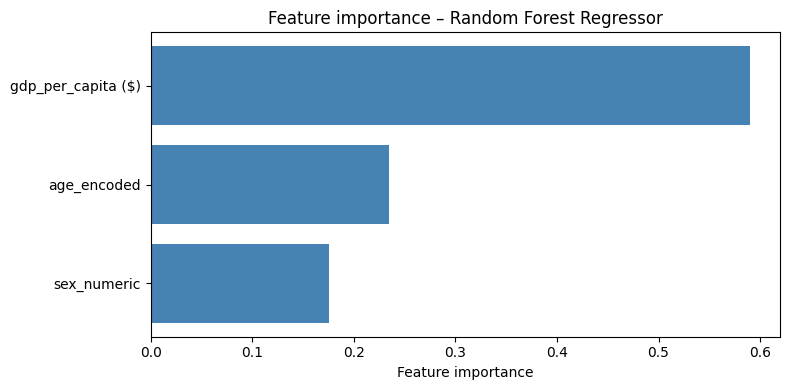

(None,
               Feature  Importance
 2  gdp_per_capita ($)    0.590064
 0         age_encoded    0.234258
 1         sex_numeric    0.175678)

In [46]:
# Vi visualiserer feature importance fra den tr√¶nede Random Forest-model

# Vi henter og sorterer vigtigheden af hver variabel
importances_rf = rf_model.feature_importances_
importance_df_rf = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances_rf
}).sort_values(by="Importance", ascending=False)

# Vi visualiserer vigtigheden som s√∏jlediagram
plt.figure(figsize=(8, 4))
plt.barh(importance_df_rf["Feature"], importance_df_rf["Importance"], color="steelblue")
plt.xlabel("Feature importance")
plt.title("Feature importance ‚Äì Random Forest Regressor")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show(), importance_df_rf

### Feature importance ‚Äì Random Forest

Random Forest-modellen g√∏r det muligt at analysere, hvilke variable der samlet set har st√∏rst betydning for forudsigelsen af selvmordsraten. Nedenfor ses v√¶gtningen for vores tre variable:

- **BNP pr. indbygger** (`gdp_per_capita ($)`): **0.59**  
  Modellen vurderer BNP som den mest betydningsfulde variabel. Dette kan skyldes, at Random Forest opdager m√∏nstre i bestemte BNP-intervaller, som h√¶nger sammen med selvmordsraten ‚Äì noget som en simpel korrelation ikke fanger.

- **Alder** (`age_encoded`): **0.23**  
  Alder spiller stadig en vigtig rolle og har konsekvent vist sig som en relevant faktor i vores tidligere modeller.

- **K√∏n** (`sex_numeric`): **0.18**  
  K√∏n har den laveste betydning i modellen, men bidrager stadig til forbedringen af pr√¶cision.

Sammenlignet med Decision Tree (beslutningstr√¶et) ser vi, at Random Forest giver en mere balanceret og robust vurdering af de tre uafh√¶ngige variable. Det skyldes, at modellen kombinerer mange forskellige tr√¶er og p√• den m√•de udligner tilf√¶ldige udsving i data. Det hj√¶lper med at finde mere generelle og p√•lidelige m√∏nstre.



### Machine Learning Model 3 ‚Äì KNN Regressor

Som en sidste model har vi valgt at inkludere **KNN Regressor** (K-Nearest Neighbors). Det er en simpel metode, som forudsiger en v√¶rdi baseret p√• gennemsnittet af de n√¶rmeste naboer i datas√¶ttet.

Modellen tager ikke h√∏jde for underliggende strukturer som beslutningstr√¶er eller line√¶r sammenh√¶ng, men kan v√¶re interessant at sammenligne, da den ofte fungerer godt i sm√• og ikke-line√¶re datas√¶t.

Vi anvender samme variable som tidligere:
- `age_encoded`
- `sex_numeric`
- `gdp_per_capita ($)`


In [47]:
# Vi bruger de samme data og split som tidligere
X = df_no_outliers[["age_encoded", "sex_numeric", "gdp_per_capita ($)"]]
y = df_no_outliers["suicides/100k pop"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Vi opretter og tr√¶ner en KNN-regressionsmodel (k=5)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Vi laver forudsigelser p√• testdatas√¶ttet
y_pred_knn = knn_model.predict(X_test)

# Vi evaluerer modellen med R¬≤ og MAE (forklaringsevne og gennemsnitlig fejl)
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f"KNN Regressor R¬≤-score: {r2_knn:.3f}")
print(f"KNN Regressor MAE: {mae_knn:.2f}")



KNN Regressor R¬≤-score: 0.158
KNN Regressor MAE: 6.71


### Konklusion ‚Äì KNN Regressor

KNN-modellen opn√•ede en R¬≤-score p√• **0.158** og en MAE p√• **6.71**. Det viser, at modellen kun forklarer ca. **15.8 % af variationen** i selvmordsraten, og den gennemsnitlige fejl er desuden h√∏jere end for b√•de beslutningstr√¶et og Random Forest.

Selvom modellen er simpel og nem at forst√•, tyder resultaterne p√•, at KNN ikke er s√¶rligt velegnet til dette datas√¶t. Det skyldes sandsynligvis, at selvmordsraten p√•virkes af mere komplekse m√∏nstre, som KNN ikke fanger ved blot at kigge p√• n√¶rmeste naboer.

Vi inkluderede modellen for at have en simpel baseline til sammenligning, og det har givet os en bedre forst√•else af, hvorfor mere avancerede modeller som Random Forest giver bedre resultater i dette projekt.


## Udvidelse ‚Äì Clustering med unsupervised learning

Udover vores arbejde med supervised learning-modeller har vi besluttet ogs√• at inddrage **unsupervised learning** i projektet. Det g√∏r vi for at unders√∏ge, om der findes skjulte m√∏nstre eller grupperinger i data, som ikke n√∏dvendigvis handler om en forudsigelse af selvmordsraten.

Vi vil derfor anvende **clustering**, fx med **K-Means**, til at identificere naturlige grupper i datas√¶ttet. Det kan f.eks. v√¶re lande eller observationer, der ligner hinanden p√• tv√¶rs af alder, k√∏n og BNP ‚Äì og som m√•ske har ens selvmordsprofiler.

Form√•let med denne del af projektet er ikke at forudsige, men at **udforske strukturer i data**, som vores tidligere modeller ikke n√∏dvendigvis opfanger. Det giver os mulighed for at f√• en mere √•ben og data-drevet forst√•else af, hvilke m√∏nstre der findes i selvmordsdata p√• tv√¶rs af verden.



## Cluster

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [49]:
# K means
# Drop 'year' because it‚Äôs just an index that would dominate distances and hide the true feature patterns


X = df.select_dtypes(include=[np.number])
X = X.drop(columns=['year'])

print("Using these numeric features:", X.columns.tolist())

Using these numeric features: ['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)', 'gdp_for_year', 'age_encoded', 'sex_numeric', 'country_numeric']


In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
# Elbow method to choose k
# Inertia just means ‚Äúhow far, in total, all points are from their group center.‚Äù

# Elbow method is simply ‚Äúplot that total distance vs. number of groups, find where adding more groups stops helping much.‚Äù
inertias = []
ks = range(1, 11)
for k in ks:
    km = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42) #Training K-Means cluster model
    km.fit(X) # Use the model on our data
    inertias.append(km.inertia_) # Save the data

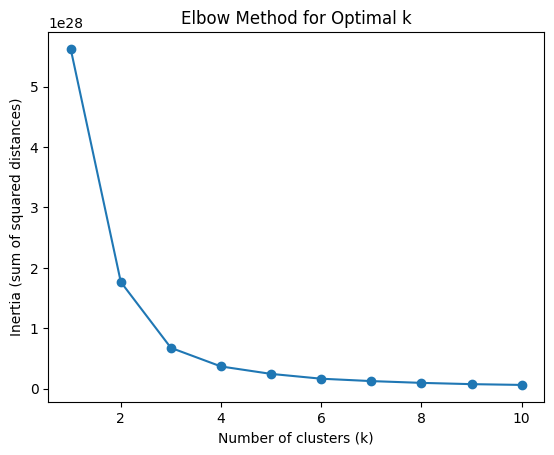

In [52]:
# Plot inertia vs. k
plt.figure()
plt.plot(ks, inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (sum of squared distances)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [53]:
# 7. Pick your k (e.g. where the ‚Äúelbow‚Äù appears; say k=3) and fit KMeans
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

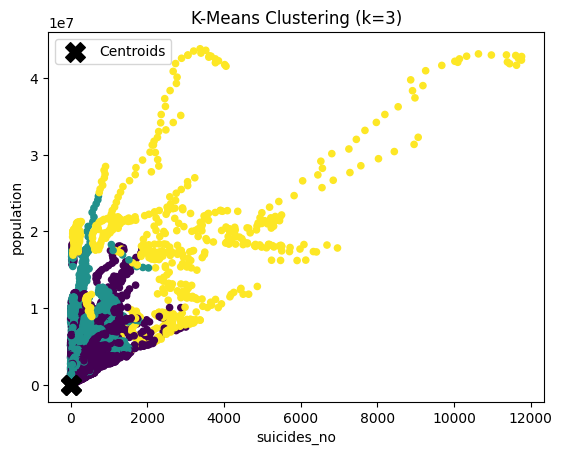

In [54]:
# 9. Visualize clusters on the first two numeric features
feat1, feat2 = X.columns[:2]
plt.figure()
plt.scatter(X[feat1], X[feat2], c=labels, s=20)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='X', s=200, c='black', label='Centroids')
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.title(f"K-Means Clustering (k={optimal_k})")
plt.legend()
plt.show()

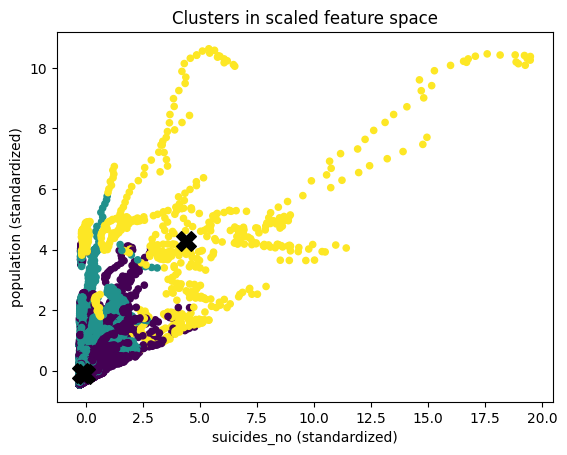

In [55]:
# After scaling:
X2 = X_scaled  # standardized matrix
cent2 = centroids  # in same space

plt.scatter(X2[:,0], X2[:,1], c=labels, s=20)
plt.scatter(cent2[:,0], cent2[:,1], marker='X', s=200, c='black')
plt.xlabel(f"{feat1} (standardized)")
plt.ylabel(f"{feat2} (standardized)")
plt.title("Clusters in scaled feature space")
plt.show()


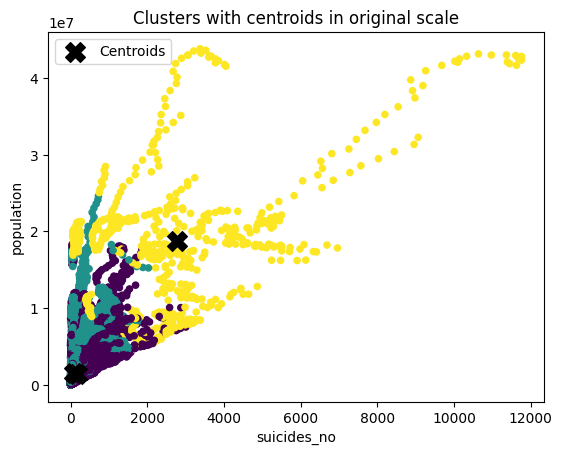

In [56]:
# Assuming you used StandardScaler() as `scaler`:
raw_centroids = scaler.inverse_transform(centroids)

plt.scatter(X[feat1], X[feat2], c=labels, s=20)
plt.scatter(raw_centroids[:,0], raw_centroids[:,1],
            marker='X', s=200, c='black', label='Centroids')
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.title("Clusters with centroids in original scale")
plt.legend()
plt.show()


In [57]:
# 10. Evaluate your clustering with silhouette score
score = silhouette_score(X, labels)
print(f"Silhouette Score for k={optimal_k}: {score:.3f}")

Silhouette Score for k=3: -0.004


## Cluster Retry

In [58]:
url = "https://raw.githubusercontent.com/LukasRonberg/BIExam/refs/heads/main/data/master.csv"
df = pd.read_csv(url)

In [59]:
# Check the first 5 rows
print(df.head())

# Summary of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check duplicates
print(f"Duplicates: {df.duplicated().sum()}")

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

In [60]:
# Drop columns with high missing values (example: if a column has >50% missing)
df = df.dropna(thresh=0.5*len(df), axis=1)

# Impute numerical columns with median
num_cols = df.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Impute categorical columns with mode (if any)
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [61]:
# Identify categorical columns (e.g., 'country', 'sex', 'generation')
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].astype('category')

In [62]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [63]:
country_counts = df['country'].value_counts(normalize=True)
df['country_freq'] = df['country'].map(country_counts)

In [64]:
cat_cols = df.select_dtypes(include='category').columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# Proceed with clustering (KMeans)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters

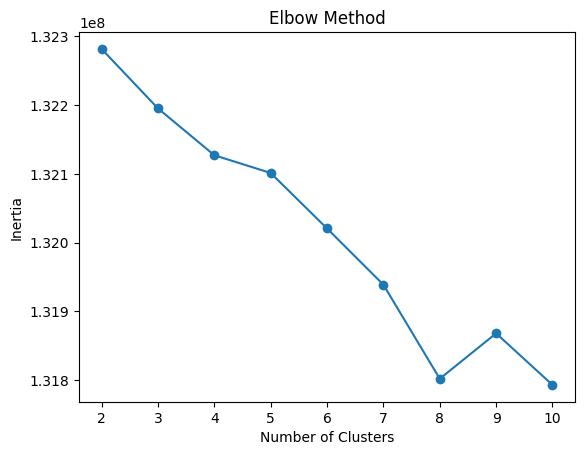

In [65]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

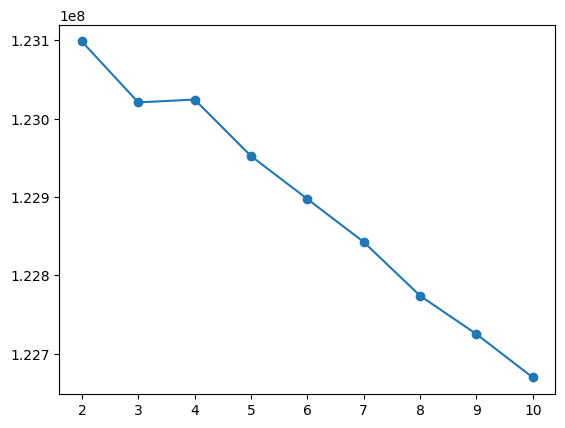

In [66]:
# After cleaning and imputation:
# Frequency encode 'country' and drop it
country_counts = df['country'].value_counts(normalize=True)
df['country_freq'] = df['country'].map(country_counts)
df = df.drop('country', axis=1)

# One-hot encode remaining categorical columns (e.g., 'sex', 'generation')
cat_cols = df.select_dtypes(include='category').columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Scale and apply PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)
pca = PCA(n_components=0.95)
scaled_pca = pca.fit_transform(scaled_data)

# Elbow Method on PCA-transformed data
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.show()